**Выявление закономерностей, определяющих успешность игр.** <br>



**Описание проекта**<br/>
Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это должно позволить сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br/>


**Содержание**<br/>
<a name="contents"></a><br/>
<a name="chapter_0"></a>  
[**1. Изучение данных из представленного файла данных**](#chapter_1.)<br/>
[1.1. Выставление окружения и импорт библиотек.](#chapter_1.1.)<br/> 
[1.2. Импортируем основной файл данных локально и применяем кострукцию except для тренажера.](#chapter_1.2.)<br/>
[1.3. Описание данных, начальное.](#chapter_1.3.)<br/>
[1.4. Краткие выводы по структуре датасета.](#chapter_1.4.)<br/>

[**2. Изучение данных конкретных столбцов и предобработка данных**](#chapter_2.)<br/>
[2.1. Столбец name.](#chapter_2.1.)<br/>
[2.2. Столбец platform.](#chapter_2.2.)<br/>
[2.3. Столбец genre.](#chapter_2.3.)<br/>
[2.4. Столбец rating.](#chapter_2.4.)<br/> 
[2.5. Столбец user_score.](#chapter_2.5.)<br/> 
[2.6. Столбец year_of_release.](#chapter_2.6.)<br/>
[2.7. Столбец critic_score.](#chapter_2.7.)<br/>
[2.8. Столбцы  na_sales, eu_sales, jp_sales и other_sales.](#chapter_2.8.)<br/> 
[2.9. Проведение выбранных изменений по всем столбцам.](#chapter_2.9.)<br/>
    
[**3. Исследовательский анализ данных.**](#chapter_3.)    
[3.1. Изменение продаж игр по годам.](#chapter_3.1.)<br/>
[3.2. Изменение количества релизов игр по годам.](#chapter_3.2.)<br/> 
[3.3. Изменение продаж игр по платформам.](#chapter_3.3.)<br/>
[3.4. Время жизни игровых платформ.](#chapter_3.4.)<br/>
[3.5. Влияние отзывов пользователей и критиков на продажи игровых платформ.](#chapter_3.5.)<br/>
[3.6. Распределение игр по жанрам.](#chapter_3.6.)<br/>

[**4. Портрет пользователя каждого региона.**](#chapter_4.)   
    
[**5. Проверка гипотез**](#chapter_5.)   
[5.1. Проверка гипотезы - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#chapter_5.1.)<br/> 
[5.2. Проверка гипотезы - cредние пользовательские рейтинги жанров Action и Sports разные.](#chapter_5.2.)<br/> 

[**6. Выводы**](#chapter_6.)   

    

    

<a name="chapter_1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1. Изучение данных из представленного файла данных.</b> <br/>
</div>


<a name="chapter_1.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.1. Выставление окружения и импорт библиотек.</b> <br/>
</div>

1.1.1. Вначале посмотрим окружение тренажера Яндекс.Практикума с помощью команды ` !conda list -e ` и получаем такой результат по необходимым нам библиотекам:

1.1.2. Смотрим окружение на своей локальной машине:

In [1]:
#!conda list -e

1.1.3. Делаем импорт библиотек, используемых в курсе, и сделаем запрос на обновление основной библиотеки.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random

import numpy as np

import math as mt
from math import factorial

import scipy.stats
from scipy.stats import norm
from scipy import stats as st

#import seaborn as sns                 # подождем пока, лучше позже, потому как при меняется вид обычных гистограмм
#sns.set(color_codes=True)

import copy #импорт библиотеки по копированию Источник: https://pythononline.ru/osnovy/modul-copy-python

#import warnings                       # предупреждения пока будем оставлять
#warnings.filterwarnings("ignore")

#mt.pi # просто проверил быстро на своей машине, на ней это в первый раз ))
#print(factorial(5))

In [3]:
#!pip install pandas -U

#!conda list pandas
#!pip install pandas==1.2.4 # инсталлировал версию 1.2.4 С версией 1.3.3 - не совсем правильно рисовалась легенда графиков
!conda list pandas

# packages in environment at C:\Users\Tachkov\anaconda3:
#
# Name                    Version                   Build  Channel
pandas                    1.4.1                    pypi_0    pypi


1.1.4. Корректируем вывод табличных данных с помощью функции set_option() в Pandas

In [4]:
#pd.set_option('max_rows', 5) # поставим ограничение на вывод 5 строк https://habr.com/ru/post/521894/
pd.set_option('display.max_columns', None) # снимаем ограничение на отображение колонок
pd.set_option('display.float_format', '{:.2f}'.format) # ставим ограничение на количество выводимых знаков у float 


<a name="chapter_1.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.2. Импортируем основной файл данных локально и применяем кострукцию except для тренажера.</b> <br/>
</div>

In [5]:
try:
    games_data = pd.read_csv('C:/1_Webartel/2021/pithon_work/datasets/games.csv') # разделители у нас запятые, можно не применять sep='\t'
except FileNotFoundError as e:                                      
    games_data = pd.read_csv('/datasets/games.csv')



1.2.1.Отсмотрим последовательно этот датасет

In [6]:
games_data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
games_data.isnull().sum() # сразу посмотрим картину по пропускам данных по всем столбцам

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
games_data.isnull().sum() / games_data.shape[0] * 100 # смотрим % пропущенных показателей.

Name               0.01
Platform           0.00
Year_of_Release    1.61
Genre              0.01
NA_sales           0.00
EU_sales           0.00
JP_sales           0.00
Other_sales        0.00
Critic_Score      51.32
User_Score        40.09
Rating            40.48
dtype: float64

In [10]:
games_data.isnull().mean().reset_index().round(2) #доли пропущенных значений можно посчитать

,index,0
0,Name,0.00
1,Platform,0.00
2,Year_of_Release,0.02
3,Genre,0.00
4,NA_sales,0.00
5,EU_sales,0.00
6,JP_sales,0.00
7,Other_sales,0.00
8,Critic_Score,0.51
9,User_Score,0.40


В трех столбцах пропущенные данные составляют более 40%, надо бы посмотреть причину.

In [11]:
display(games_data.columns) # названия столбцов нашего файла

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [12]:
games_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,16446.00,NaN,NaN,NaN,2006.48,5.88,1980.00,2003.00,2007.00,2010.00,2016.00
Genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_sales,16715.00,NaN,NaN,NaN,0.26,0.81,0.00,0.00,0.08,0.24,41.36
EU_sales,16715.00,NaN,NaN,NaN,0.15,0.50,0.00,0.00,0.02,0.11,28.96
JP_sales,16715.00,NaN,NaN,NaN,0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_sales,16715.00,NaN,NaN,NaN,0.05,0.19,0.00,0.00,0.01,0.03,10.57
Critic_Score,8137.00,NaN,NaN,NaN,68.97,13.94,13.00,60.00,71.00,79.00,98.00
User_Score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
games_data.describe(include=[object]).T # полезное отображение https://mlbootcamp.ru/ru/article/tutorial/ или  include =['object', 'float', 'int'] http://espressocode.top/python-pandas-dataframe-describe-method/

,count,unique,top,freq
Name,16713,11559,Need for Speed: Most Wanted,12
Platform,16715,31,PS2,2161
Genre,16713,12,Action,3369
User_Score,10014,96,tbd,2424
Rating,9949,8,E,3990


In [14]:
games_data.describe(include=[int, float]).T # тоже надо бы запомнить, полезное отображение

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.00,2006.48,5.88,1980.00,2003.00,2007.00,2010.00,2016.00
NA_sales,16715.00,0.26,0.81,0.00,0.00,0.08,0.24,41.36
EU_sales,16715.00,0.15,0.50,0.00,0.00,0.02,0.11,28.96
JP_sales,16715.00,0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_sales,16715.00,0.05,0.19,0.00,0.00,0.01,0.03,10.57
Critic_Score,8137.00,68.97,13.94,13.00,60.00,71.00,79.00,98.00


In [15]:
games_data.loc[games_data.duplicated(keep=False)].sort_values('Platform') # keep='False' смотрим повторы
#http://espressocode.top/python-pandas-dataframe-duplicated/ https://zen.yandex.ru/media/id/5ee6f73b7c

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


In [16]:
games_data.isnull().sum() # сразу посмотрим картину по пропускам данных по всем столбцам

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


 <a name="chapter_1.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.3. Описание данных, начальное.</b> <br/>
</div>

<b>Таблица games:</b>

<b>Name</b> — название игры

<b>Platform</b> — платформа

<b>Year_of_Release</b> — год выпуска

<b>Genre</b> — жанр игры

<b>NA_sales</b> — продажи в Северной Америке (миллионы проданных копий)

<b>EU_sales</b> — продажи в Европе (миллионы проданных копий)

<b>JP_sales</b> — продажи в Японии (миллионы проданных копий)

<b>Other_sales</b> — продажи в других странах (миллионы проданных копий)

<b>Critic_Score</b> — оценка критиков (максимум 100)

<b>User_Score</b> — оценка пользователей (максимум 10)

<b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
Данные за 2016 год могут быть неполными.

<a name="chapter_1.4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.4. Краткие выводы по структуре​ датасета.</b> <br/>
</div>
    
- Что сразу можно сказать - 16715 строк. Есть пропущенные данные в пяти столбцах. По заданию надо привести к строчным символам названия столбцов. 

- Судя по всему, также поступим и со всеми именами в Name, Platform, Genre.

- Уже знаем и мне это интересно, как обычно не имеющего дело с играми - у нас целых 11559 уникальных названий в Name, 31 уникальная  Platform и всего 12 уникальных  Genre, и пока мне не совсем понятные 96 уникальных User_Score и 8 уникальных Rating.

- По не совсем понимаю, зачем тип object для User_Score, если там такое малое количество уникальных значений, и float64 для Critic_Score, если там данные от 13 и до 98. Получается, что пока в мире нет игры с абсолютным рейтингом. Интересно, я хоть знаю название игры-лидера? Надо посмотреть обязательно. Пока название самой встречаемой - Need for Speed: Most Wanted, вижу в первый раз ))

- Year_of_Release имеет данные float64, что лучше бы сменить и целых 269 пропущенных значений. Это старые игры? Впрочем, еще узнаем позже, когда рассмотрим более подробно.

- Обращает внимание еще 2 пропущенных Name, надо отсмотреть эти строки.

- И большое количество пропущенных значений в Critic_Score - 8578, User_Score - 6701 и Rating - 6766. Часть можно списать на старый год выпуска игры, часть на то, что Япония - своеобразный рынок, который иногда довольно замкнутый.

- Игры у нас от 1980 (в качестве версии по старым играм) до 2018 года. 

- Action самый популярный жанр - 3369, это порядка 20,1%.

- Премиальным рынком по тем временам был в NA_sales с максимальной цифрой в 41.36, затем EU_sales с 28.96, у JP_sales уже 10.22, и на всех остальных всего Other_sales - 10.57. Получается, что без планов зайти на рынок NA нужно несколько раз подумать, прежде, чем стартовать с игровым стартапом. Хотя, впрочем, это только выводы только первого взгляда - могут быть и неправильными. 

<a name="chapter_2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2. Изучение данных конкретных столбцов и предобработка данных.</b> <br/>
</div>

In [17]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a name="chapter_2.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1. Столбец name.</b> <br/>
</div>

Давайте сразу переименуем столбцы, приведем названия к строчному виду.

In [18]:
print(games_data.columns) # названия столбцов нашего файла

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [19]:
columns_new = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
games_data.set_axis(columns_new, axis='columns', inplace=True)
#games_data.columns=games_data.columns.str.lower() # можно было и так сделать в этом случае, когда ничего не надо дополнительно править руками, запомним
display(games_data.head(5)) # и сразу проверим


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [20]:
games_data['name'].value_counts(dropna=False) # ставим значение False для параметра dropna, чтобы учесть возможные NaN

Need for Speed: Most Wanted                         12
Madden NFL 07                                        9
FIFA 14                                              9
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11560, dtype: int64

In [21]:
games_data.sort_values('name') # и заодно посмотрим две игры с name=NaN

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14983,Beyblade Burst,3DS,2016.00,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1079,Fire Emblem Fates,3DS,2015.00,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.00,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013.00,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
13794,Haikyu!! Cross Team Match!,3DS,2016.00,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8280,uDraw Studio: Instant Artist,Wii,2011.00,Misc,0.06,0.09,0.00,0.02,NaN,tbd,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
9134,¡Shin Chan Flipa en colores!,DS,2007.00,Platform,0.00,0.00,0.14,0.00,NaN,NaN,NaN
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


Много ли игр было у нас в 1993 году?

In [22]:
games_data_number = games_data.query('year_of_release == 1993.00')

games_data_number.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,60,59,Super Street Fighter II,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,62,5,SNES,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_release,62.00,NaN,NaN,NaN,1993.00,0.00,1993.00,1993.00,1993.00,1993.00,1993.00
genre,60,12,Platform,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
na_sales,62.00,NaN,NaN,NaN,0.27,0.84,0.00,0.00,0.00,0.08,5.99
eu_sales,62.00,NaN,NaN,NaN,0.08,0.29,0.00,0.00,0.00,0.01,2.15
jp_sales,62.00,NaN,NaN,NaN,0.41,0.47,0.00,0.07,0.20,0.52,2.12
other_sales,62.00,NaN,NaN,NaN,0.02,0.05,0.00,0.00,0.00,0.00,0.29
critic_score,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_score,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Довольно много, 60 штук, и всего одно название встречается дважды. То есть эти две игры не похожи ни по одному параметру на какие-то уникальные игры. И у них нет critic_score, user_score и rating.

In [23]:
games_data[pd.isnull(games_data['name'])] # смотрим строки с NaN в столбце 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [24]:
games_data[pd.isnull(games_data['genre'])] # смотрим строки с NaN в столбце 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Делаем по этому столбцу такие выводы:
- можно перевести его в строчный вид, нет пока аргументов против такого шага, может убрать разночтения из-за регистра написания названия, потом проверим, кстати по unigue
- два пропуска данных совпадают по строкам с двумя же пропусками данных по столбцу genre (где их только опять же два), и можно, судя по всему, без особого ущерба удалить эти строки.

<a name="chapter_2.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.2. Столбец platform.</b> <br/>
</div>

In [25]:
games_data['platform'].value_counts(dropna=False)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

По игровым платформам надо быть экспертом, вызвало вопросы числовое название - 2600. Но судя по сему, это Atari VCS, позже названная Atari 2600, которая появилась к Рождеству 1977 года и стала доминирующей игровой приставкой конца 1970-х — начала 1980-х, https://ru.wikipedia.org/wiki/Atari_2600

И да, столбец можно перевести в строчный вид, хотя жизненной необходимости в этом шаге нет.

<a name="chapter_2.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.3. Столбец genre.</b> <br/>
</div>

In [26]:
games_data['genre'].value_counts(dropna=False)

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
NaN                2
Name: genre, dtype: int64

Две игры с genre с NaN мы уже нашли ранее (это те же строки, где нет и name)  и судьбу определили.

In [27]:
games_data[pd.isnull(games_data['genre'])] # смотрим строки с NaN в столбце 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


И у меня вызывает вопросы genre равный Platform, давайте посмотрим.

In [28]:
games_data_p = games_data.query('genre == "Platform"')

games_data_p.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,888,588,Skylanders SWAP Force,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,888,26,GBA,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_release,878.00,NaN,NaN,NaN,2003.86,6.42,1981.00,2001.00,2004.00,2008.00,2016.00
genre,888,1,Platform,888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
na_sales,888.00,NaN,NaN,NaN,0.50,1.50,0.00,0.05,0.14,0.44,29.08
eu_sales,888.00,NaN,NaN,NaN,0.23,0.58,0.00,0.01,0.05,0.18,9.14
jp_sales,888.00,NaN,NaN,NaN,0.15,0.52,0.00,0.00,0.00,0.04,6.81
other_sales,888.00,NaN,NaN,NaN,0.06,0.16,0.00,0.00,0.01,0.05,2.88
critic_score,497.00,NaN,NaN,NaN,68.06,13.21,19.00,59.00,69.00,77.00,97.00
user_score,567,65,tbd,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
display(games_data_p.sample(10, random_state=1)) # посмотрим рандомно

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8241,The Hobbit,GC,2003.00,Platform,0.13,0.03,0.00,0.00,61.00,7.3,E
4046,SpongeBob SquarePants: Creature from the Krust...,DS,2006.00,Platform,0.45,0.00,0.00,0.04,56.00,7.3,E
13154,Chameleon Twist 2,N64,1998.00,Platform,0.04,0.01,0.00,0.00,NaN,NaN,NaN
4200,Spider-Man 3,DS,2007.00,Platform,0.41,0.02,0.00,0.04,79.00,6.5,E10+
14210,Sabre Wulf,GBA,NaN,Platform,0.02,0.01,0.00,0.00,75.00,8,E
18,Super Mario World,SNES,1990.00,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
6364,Despicable Me: The Game,Wii,2010.00,Platform,0.16,0.08,0.00,0.02,NaN,NaN,NaN
2222,Mega Man 4,NES,1991.00,Platform,0.51,0.09,0.32,0.01,NaN,NaN,NaN
3649,Rayman Origins,Wii,2011.00,Platform,0.21,0.27,0.00,0.06,92.00,8.3,E10+
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E


Ничего особого не увидел и опять обратился к интернет-источникам и с удивлением увидел, что есть такой жанр - Platform, где основное внимание уделяется прыжкам или сложностям навигации, часто включают в себя элементы игр-экшенов. <br/>
https://ru.wikipedia.org/wiki/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80

- И да, столбец тоже можно перевести в строчный вид, хотя жизненной необходимости в этом шаге нет.

<a name="chapter_2.4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.4. Столбец rating.</b> <br/>
</div>

In [30]:
games_data['rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Непонятно, что за рейтинг K-A? Стоп, стало понятно - это начальная версия рейтинга <b>«E»</b> («Everyone») — «Для всех», можно посмотреть год этих игр.

https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board<br/>
<b>«EC»</b> («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».

<b>«E»</b> («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")

<b>«E10+»</b> («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.

<b>«T»</b> («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

<b>«M»</b> («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. 

<b>«AO»</b> («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.

<b>«RP»</b> («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу. 

Посмотрим, что за игры с рейтингом NaN, была версия, что это старые или японские игры.

In [31]:
games_data[pd.isnull(games_data['rating'])].sort_values(by='year_of_release', ascending=True) # смотрим строки с NaN в столбце 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
546,Missile Command,2600,1980.00,Shooter,2.56,0.17,0.00,0.03,NaN,NaN,NaN
2650,Boxing,2600,1980.00,Fighting,0.72,0.04,0.00,0.01,NaN,NaN,NaN
4019,Ice Hockey,2600,1980.00,Sports,0.46,0.03,0.00,0.01,NaN,NaN,NaN
5360,Freeway,2600,1980.00,Action,0.32,0.02,0.00,0.00,NaN,NaN,NaN
262,Asteroids,2600,1980.00,Shooter,4.00,0.26,0.00,0.05,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16059,Dance! It's Your Stage,Wii,NaN,Misc,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16079,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [32]:
games_data[pd.isnull(games_data['rating'])].sort_values(by='year_of_release', ascending=False) # смотрим строки с NaN в столбце 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,Winning Post 8 2016,PSV,2016.00,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN
13183,Kamen Rider: Battride War Genesis,PSV,2016.00,Action,0.00,0.00,0.05,0.00,NaN,NaN,NaN
10435,Taiko no Tatsujin: Don Don! Mystery Adventure,3DS,2016.00,Action,0.00,0.00,0.10,0.00,NaN,NaN,NaN
14700,Kenka Bancho Otome,PSV,2016.00,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16501,River City Ransom SP,3DS,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16059,Dance! It's Your Stage,Wii,NaN,Misc,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16079,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [33]:
games_data[pd.isnull(games_data['rating'])].sort_values(by='jp_sales', ascending=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5812,Spin Jam,PS,2000.00,Puzzle,0.17,0.12,0.00,0.02,NaN,NaN,NaN
7609,Disney's Tarzan,N64,2000.00,Platform,0.16,0.04,0.00,0.00,NaN,NaN,NaN
7610,South Park Rally,N64,2000.00,Racing,0.16,0.04,0.00,0.00,NaN,NaN,NaN
13272,The Grim Adventures of Billy & Mandy,Wii,2006.00,Action,0.04,0.00,0.00,0.00,NaN,NaN,NaN
7620,SingStar: Back to the 80s,PS3,2011.00,Misc,0.00,0.16,0.00,0.04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27,Pokemon Black/Pokemon White,DS,2010.00,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.00,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.00,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN


Версия, что это старые или японские игры не подтвердилась. Версия, что нет рейтинга у неуспешных игр тоже особо не проходит, есть Super Mario Bros. с приличными продажами.

- лучше бы с NaN в этом столбце ничего не делать. Хотя для удобства можно поставить метку типа nor (нет рейтинга)

<a name="chapter_2.5."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.5. Столбец user_score.</b> <br/>
</div>

In [34]:
games_data['user_score'].value_counts(dropna=False)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

tbd такое сокращение даже в играх имеет много разных смыслов, но здесь, скорее всего означает сокращение To Be Determined - будет определено. Посмотрим срез по tbd.

In [35]:
games_data_tbd = games_data.query('user_score == "tbd"')
#display(games_data_tbd.head(5))
games_data_tbd.describe(include='all').T
#count 	unique 	top 	freq 	mean 	std 	min 	25% 	50% 	75% 	max
#Name 	16713 	11559 	Need for Speed: Most Wanted 	12 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
#Platform 	16715 	31 	PS2 	2161 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
#Year_of_Release 	16446.00 	NaN 	NaN 	NaN 	2006.48 	5.88 	1980.00 	2003.00 	2007.00 	2010.00 	2016.00
#Genre 	16713 	12 	Action 	3369 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
#NA_sales 	16715.00 	NaN 	NaN 	NaN 	0.26 	0.81 	0.00 	0.00 	0.08 	0.24 	41.36
#EU_sales 	16715.00 	NaN 	NaN 	NaN 	0.15 	0.50 	0.00 	0.00 	0.02 	0.11 	28.96
#JP_sales 	16715.00 	NaN 	NaN 	NaN 	0.08 	0.31 	0.00 	0.00 	0.00 	0.04 	10.22
#Other_sales 	16715.00 	NaN 	NaN 	NaN 	0.05 	0.19 	0.00 	0.00 	0.01 	0.03 	10.57
#Critic_Score 	8137.00 	NaN 	NaN 	NaN 	68.97 	13.94 	13.00 	60.00 	71.00 	79.00 	98.00
#User_Score 	10014 	96 	tbd 	2424 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
#Rating 	9949 	8 	E 	3990 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,2424,1941,Rapala Pro Bass Fishing 2010,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,2424,16,DS,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_release,2376.00,NaN,NaN,NaN,2007.45,3.48,1997.00,2005.00,2008.00,2010.00,2016.00
genre,2424,12,Misc,449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
na_sales,2424.00,NaN,NaN,NaN,0.13,0.18,0.00,0.03,0.08,0.15,3.45
eu_sales,2424.00,NaN,NaN,NaN,0.04,0.11,0.00,0.00,0.01,0.04,2.59
jp_sales,2424.00,NaN,NaN,NaN,0.00,0.03,0.00,0.00,0.00,0.00,0.86
other_sales,2424.00,NaN,NaN,NaN,0.02,0.04,0.00,0.00,0.01,0.02,1.09
critic_score,1082.00,NaN,NaN,NaN,60.71,11.19,23.00,54.00,62.00,69.00,90.00
user_score,2424,1,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Разные года, все жанры и не все платформы и не все рейтинги

In [36]:
games_data[pd.isnull(games_data['user_score'])] # смотрим строки с NaN в столбце 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Эта таблица показывает нам, что такое массовое отсутствие critic_score, user_score и rating имеет какую-то общую причину. Давайте ради интереса посмотрим уже выделенный ранее сегмент игр 1993 года

In [37]:
#games_data_number = games_data.query('year_of_release == 1993.00')
#display(games_data_number.head(60)).sort_values(by='platform', ascending=True)
#games_data_number.head(60).sort_values(by='name', ascending=True)
games_data_number.sort_values(by='name', ascending=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13343,Beyond Oasis,GEN,1993.00,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
6290,Bishoujo Senshi Sailormoon R,SNES,1993.00,Fighting,0.00,0.00,0.27,0.00,NaN,NaN,NaN
2575,Capcom's Soccer Shootout,SNES,1993.00,Sports,0.00,0.00,0.80,0.00,NaN,NaN,NaN
10247,Classic Road,SNES,1993.00,Sports,0.00,0.00,0.11,0.00,NaN,NaN,NaN
4229,Crayon Shin-Chan: Arashi o Yobu Enji,SNES,1993.00,Platform,0.00,0.00,0.46,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3770,Virtual Soccer,SNES,1993.00,Sports,0.00,0.00,0.53,0.00,NaN,NaN,NaN
3774,Winning Post,SNES,1993.00,Sports,0.00,0.00,0.53,0.00,NaN,NaN,NaN
5176,Yuu Yuu Hakusho,SNES,1993.00,Fighting,0.00,0.00,0.36,0.00,NaN,NaN,NaN
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


Странно, но ответа на вопрос, что является причиной массового отсутствия рейтингов и отзывов я не вижу пока.

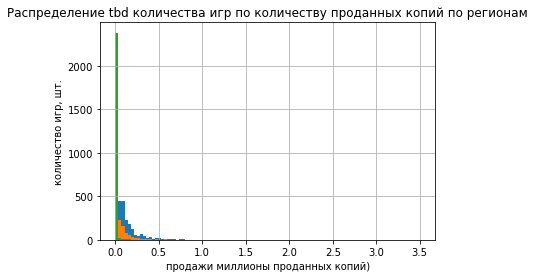

In [38]:
games_data_tbd['na_sales'].hist(bins=100, range = (0, 3.5))
games_data_tbd['eu_sales'].hist(bins=100, range = (0, 3.5))
games_data_tbd['jp_sales'].hist(bins=100, range = (0, 3.5))
plt.xlabel('продажи миллионы проданных копий)')
plt.ylabel('количество игр, шт.')
plt.title('Распределение tbd количества игр по количеству проданных копий по регионам');


Ну тогда еще версией наличия tbd будет малое количество продаж. Видимо, малое количество продаж не дает необходимого количества оценок или отзывов, на которых user_score формируется.

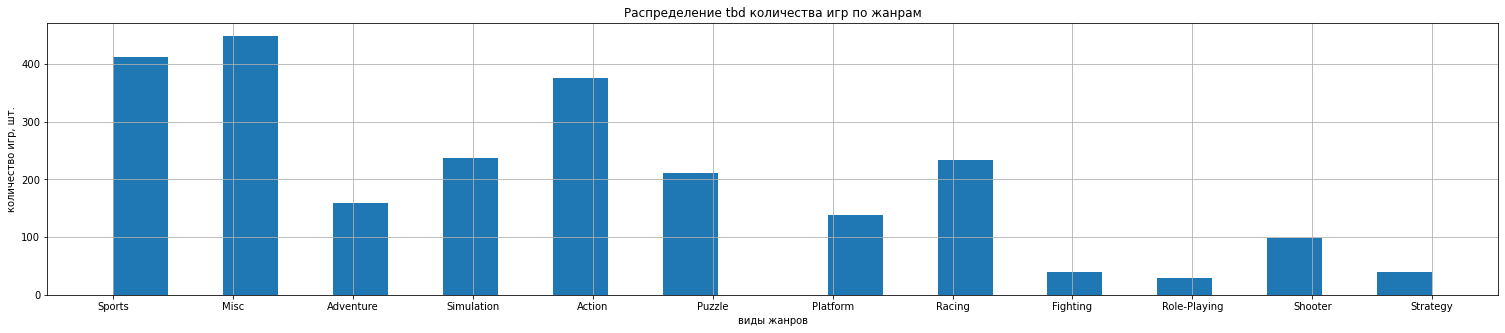

In [39]:
games_data_tbd['genre'].hist(bins=24, figsize=(26, 5))

plt.xlabel('виды жанров')
plt.ylabel('количество игр, шт.')
plt.title('Распределение tbd количества игр по жанрам');

Есть лидеры и отстающие, типа sports и puzzle - но ответа на интересующий вопрос это не дало.

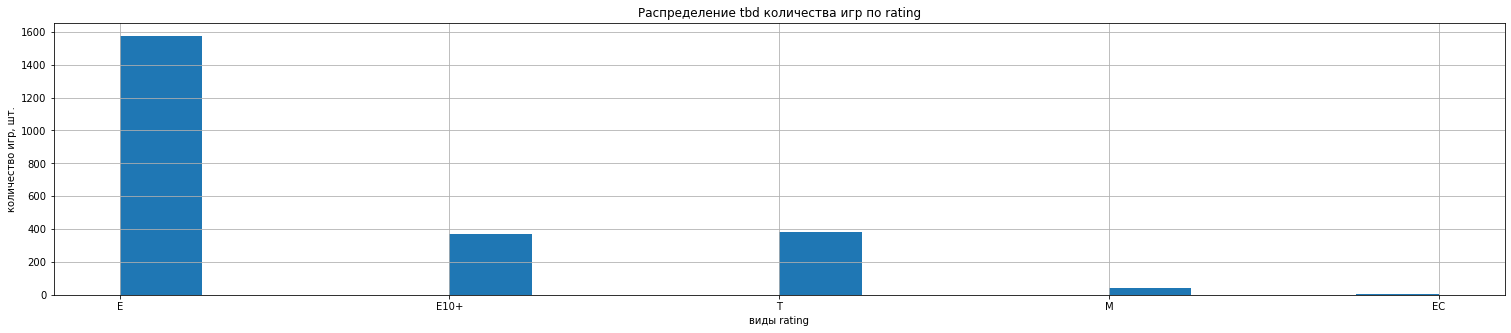

In [40]:
games_data_tbd['rating'].hist(bins=16, figsize=(26, 5))

plt.xlabel('виды rating')
plt.ylabel('количество игр, шт.')
plt.title('Распределение tbd количества игр по rating');

Здесь явный лидер в виде рейтинга e

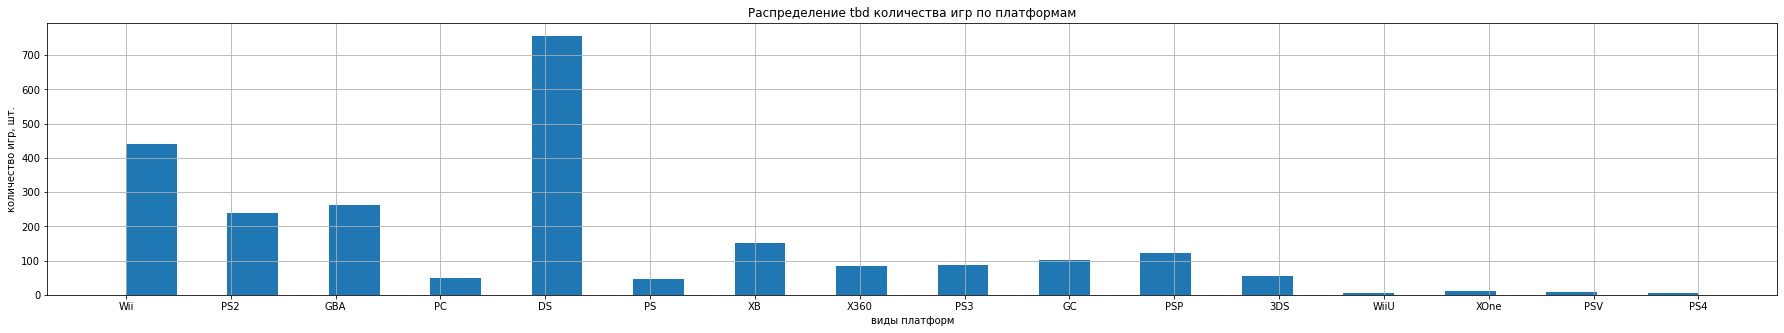

In [41]:
games_data_tbd['platform'].hist(bins=31, figsize=(31, 5))

plt.xlabel('виды платформ')
plt.ylabel('количество игр, шт.')
plt.title('Распределение tbd количества игр по платформам');

И здесь явный лидер - ds

- еще версия, что рейтинги и отзывы в основном определяются маркетинговыми усилиями выпускающих и продюссирующих фирм, которых, к сожалению - нет у нас в датасете.

По столбцу user_score считаю сделать следующее:
- нет смысла ни удалять строки, ни делать какие-то определенные замены tbd и NaN, это может исказить картину в целом.
- для дальнейшей работы с типом .float в данном столбце и tbd и NaN изменить на информационные метки типа -1

<a name="chapter_2.6."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.6. Столбец year_of_release.</b> <br/>
</div>

In [42]:
games_data['year_of_release'].value_counts(dropna=False)

2008.00    1427
2009.00    1426
2010.00    1255
2007.00    1197
2011.00    1136
2006.00    1006
2005.00     939
2002.00     829
2003.00     775
2004.00     762
2012.00     653
2015.00     606
2014.00     581
2013.00     544
2016.00     502
2001.00     482
1998.00     379
2000.00     350
1999.00     338
1997.00     289
NaN         269
1996.00     263
1995.00     219
1994.00     121
1993.00      62
1981.00      46
1992.00      43
1991.00      41
1982.00      36
1986.00      21
1989.00      17
1983.00      17
1990.00      16
1987.00      16
1988.00      15
1985.00      14
1984.00      14
1980.00       9
Name: year_of_release, dtype: int64

In [43]:
games_data[pd.isnull(games_data['year_of_release'])] # смотрим строки с NaN в столбце 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


По столбцу year_of_release:
    
- Большинство строк с данными, удалять нет смысла
- для дальнейшей работы с типом .int в данном столбце NaN изменить на информационную метку типа -1 
- изменить данные на .int 

<a name="chapter_2.7."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.7. Столбец critic_score.</b> <br/>
</div>

In [44]:
games_data['critic_score'].value_counts(dropna=False)

NaN      8578
70.00     256
71.00     254
75.00     245
78.00     240
         ... 
20.00       3
21.00       1
17.00       1
22.00       1
13.00       1
Name: critic_score, Length: 83, dtype: int64

In [45]:
games_data[pd.isnull(games_data['critic_score'])] # смотрим строки с NaN в столбце 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [46]:
games_data_nan_critic_score = games_data[pd.isnull(games_data['critic_score'])]
games_data_nan_critic_score.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,8576,7122,The Amazing Spider-Man 2 (2014),7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,8578,31,DS,1434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_release,8463.00,NaN,NaN,NaN,2005.82,7.05,1980.00,2001.00,2008.00,2011.00,2016.00
genre,8576,12,Action,1479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
na_sales,8578.00,NaN,NaN,NaN,0.18,0.72,0.00,0.00,0.02,0.14,29.08
eu_sales,8578.00,NaN,NaN,NaN,0.09,0.32,0.00,0.00,0.00,0.05,10.95
jp_sales,8578.00,NaN,NaN,NaN,0.10,0.34,0.00,0.00,0.00,0.06,10.22
other_sales,8578.00,NaN,NaN,NaN,0.02,0.09,0.00,0.00,0.00,0.02,2.74
critic_score,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_score,1915,85,tbd,1342,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Картина, похожая на user_score. <br/>
По столбцу critic_score считаю сделать следующее:
- нет смысла ни удалять строки, ни делать какие-то определенные замены NaN, это может исказить картину в целом.
- для дальнейшей работы с типом .float в данном столбце NaN изменить на информационные метки типа -1

<a name="chapter_2.8."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.8. Столбцы  na_sales, eu_sales, jp_sales и other_sales.</b> <br/>
</div>

In [47]:
games_data['na_sales'].value_counts(dropna=False)

0.00     4508
0.02      576
0.03      561
0.04      549
0.01      545
         ... 
3.68        1
2.98        1
2.61        1
3.04        1
41.36       1
Name: na_sales, Length: 402, dtype: int64

In [48]:
games_data['eu_sales'].value_counts(dropna=False)

0.00     5870
0.01     1494
0.02     1308
0.03      926
0.04      709
         ... 
1.87        1
1.75        1
1.44        1
1.60        1
28.96       1
Name: eu_sales, Length: 307, dtype: int64

In [49]:
games_data['jp_sales'].value_counts(dropna=False)

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: jp_sales, Length: 244, dtype: int64

Отметим бОльшее количество игр с малыми продажами именно в Японии, что является интересной характеристикой данного совеобразного рынка. Думаю, некоторые игры и не пытаются адаптировать к данному рынку.

In [50]:
games_data['other_sales'].value_counts(dropna=False)

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
2.11       1
7.53       1
1.21       1
1.79       1
0.93       1
Name: other_sales, Length: 155, dtype: int64

По заданию надо посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

In [51]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
display(games_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E,82.54
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<a name="chapter_2.9."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.9. Проведение выбранных изменений по всем столбцам.</b> <br/>
</div>

Приведем к строчному виду все названия. Причем только в столбце name, а в остальных только для красоты отображения. ))

In [52]:
lower_columns = ['name','platform','genre','rating']
for column in lower_columns:
    games_data[column] = games_data[column].str.lower()
games_data.head(5) # и сразу проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.00,sports,41.36,28.96,3.77,8.45,76.00,8,e,82.54
1,super mario bros.,nes,1985.00,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008.00,racing,15.68,12.76,3.79,3.29,82.00,8.3,e,35.52
3,wii sports resort,wii,2009.00,sports,15.61,10.93,3.28,2.95,80.00,8,e,32.77
4,pokemon red/pokemon blue,gb,1996.00,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Посмотрим, сколько стало уникальных названий в name 

In [53]:
games_data['name'].describe()

count                           16713
unique                          11559
top       need for speed: most wanted
freq                               12
Name: name, dtype: object

Было - 11559, изменений нет. Уберем еще пробелы на всякий случай в этом столбце.

In [54]:
games_data['name'] = games_data['name'].str.replace('^ +| +$', '', regex=True) # Заменить пробел на обоих концах : через регулярное выражение
games_data['name'] = games_data['name'].str.replace('  ', '', regex=True) # заменить два пробела
games_data['name'].describe() # и тут же проверим - были ли лишние пробелы

count                           16713
unique                          11559
top       need for speed: most wanted
freq                               12
Name: name, dtype: object

Ничего не изменилось, с пробелами было все нормально, но небольшая перестраховка не помешает ))

Давайте все-таки не удалим строки с NaN, которые у нас одновременно и в name и в genre, а поставим в этом поле non (нет названия)

In [55]:
games_data[games_data['name'].isnull()].index.tolist()

[659, 14244]

In [56]:
games_data['name'] = games_data['name'].fillna('non')
games_data_non = games_data.query('index == 659 | index == 14244')
display(games_data_non)   # и сразу проверим                                        

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,non,gen,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,non,gen,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


А в genre изменим на nog

In [57]:
games_data['genre'] = games_data['genre'].fillna('nog')
games_data_nog = games_data.query('index == 659 | index == 14244')
display(games_data_nog)   # и сразу проверим  

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,non,gen,1993.00,nog,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,non,gen,1993.00,nog,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


А в rating​ изменим NaN на nor. И, заодно рейтинг k-a заменим на более новый e

In [58]:
games_data['rating'] = games_data['rating'].fillna('nor')
games_data['rating'] = games_data['rating'].replace('k-a', 'e')
games_data['rating'].value_counts(dropna=False) # и сразу проверим
#NaN     6766
#E       3990
#T       2961
#M       1563
#E10+    1420
#EC         8
#K-A        3
#RP         3
#AO         1
#Name: rating, dtype: int64

nor     6766
e       3993
t       2961
m       1563
e10+    1420
ec         8
rp         3
ao         1
Name: rating, dtype: int64

Заменим в user_score значение tbd на NaN 

In [59]:
games_data['user_score'] = games_data['user_score'].replace('tbd', np.NaN)

И далее заменим везде NaN на информационные метки -1 и приведем данные в столбцах к нужным форматам, там, где это необходимо.

In [60]:
games_data['year_of_release'] = games_data['year_of_release'].fillna(-1)
games_data['critic_score'] = games_data['critic_score'].fillna(-1)
games_data['user_score'] = games_data['user_score'].fillna(-1)

games_data['year_of_release'] = games_data['year_of_release'].astype('int')
games_data['critic_score'] = games_data['critic_score'].astype('float')
games_data['user_score'] = games_data['user_score'].astype('float')
games_data.info() # и сразу проверим


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


In [61]:
games_data.isnull().sum() # сразу посмотрим картину по пропускам данных по всем столбцам

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

Готовы к следующим подвигам ))

<a name="chapter_3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3. Исследовательский анализ данных.</b> <br/>
</div>

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? <br/>
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?<br/>
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.<br/>
Не учитывайте в работе данные за предыдущие годы.<br/>
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.<br/>
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.<br/>
Соотнесите выводы с продажами игр на других платформах.<br/>
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?<br/>
Данные за 2016 год могут быть неполными.

Давайте уж сразу смотреть помимо общих продаж еще и по отдельным рынкам. Мне это интересно.

<a name="chapter_3.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.1. Изменение продаж игр по годам.</b> <br/>
</div>

In [62]:
games_data_sales_year = games_data.groupby(
    'year_of_release').agg(na_sales=('na_sales','sum'), eu_sales=('eu_sales','sum'), jp_sales=(
    'jp_sales','sum'), other_sales=('other_sales','sum'), total_sales=('total_sales','sum'))
games_data_sales_year = games_data_sales_year.sort_values('year_of_release', ascending = False)
display(games_data_sales_year)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
year_of_release,,,,,
2016,44.93,51.22,19.31,14.48,129.94
2015,106.86,96.72,34.09,30.31,267.98
2014,132.27,122.74,39.69,36.83,331.53
2013,153.65,121.55,47.69,38.35,361.24
2012,153.26,114.59,51.80,36.19,355.84
2011,238.79,162.97,53.07,52.75,507.58
2010,300.65,171.42,59.49,58.57,590.13
2009,335.55,187.94,61.89,73.44,658.82
2008,348.69,181.14,60.25,81.42,671.50


In [63]:
games_data_sales_year_total = games_data.groupby(
    'year_of_release').agg(total_sales=('total_sales','sum'))
games_data_sales_year_total = games_data_sales_year_total.sort_values('year_of_release', ascending = False)


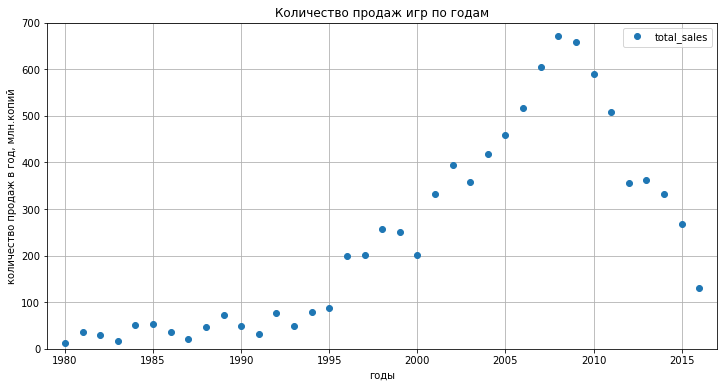

In [64]:
games_data_sales_year_total.plot(y='total_sales', style='o', ylim=(0, 700), xlim=(1979, 2017),grid=True, figsize=(12, 6))
plt.xlabel('годы')
plt.ylabel('количество продаж в год, млн.копий')
plt.title('Количество продаж игр по годам')
plt.show()

В 80-годы я, помню, будучи научным сотрудником в институте теплофизики СО РАН СССР - работал на Электроника-60, это серия DEC. И первые русскоязычные игры были из лаборатории Вигдорчика, жанра Adventure. Обычная бродилка за сокровищами. Взорвал тогда раынок Тетрис. Это единственная игра, где я потратил не так мало времени, лабораторией соревнования устраивали )) <br/>
И где-то с 1993 года я более и не программировал своими руками, пришлось уйти в бизнес, был очень интересный период выживания в этом мире ))<br/>
Потом Пентиум начал массово производиться с 1993 года, презентация была в марте того года. Думал, что подъем пошел с ним. Хотя, на выпуск игр тоже надо время. На диаграмме рывок с 1996 года. И пик в в 2008-2009 г.г. А  в 2009 появился iPhone 3GS и уже в июне 2010 года был представлен iPhone 4 с обновлённой операционной системой iOS. Судя по всему, это и послужило массовому оттоку клиентов и, соответственно денег, в мобильный сегмент.

<a name="chapter_3.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.2. Изменение количества релизов игр по годам.</b> <br/>
</div>

Если смотреть, сколько игр выпускалось каждый год, то надо смотреть только первую дату появления релиза, первый год. Тогда мне не хватает столбца с датой в формате datetime64. <br/>
Сделаем новый столбец с таким годом в формате даты. Но -1 этого уже не даст. Сделаем копию датасета и переименуем -1 в 2022.

In [65]:
games_data_2 = games_data.copy()
games_data_2['year_of_release'] = games_data_2['year_of_release'].replace(-1, 2022)

In [66]:
games_data_2['year_0'] = pd.to_datetime(games_data_2['year_of_release'], format='%Y')
games_data_2sort = games_data_2.sort_values(by='year_of_release', ascending = False)
display(games_data_2sort)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_0
627,rock band,x360,2022,misc,1.93,0.33,0.00,0.21,92.00,8.20,t,2.47,2022-01-01
7008,tribes: aerial assault,ps2,2022,shooter,0.11,0.09,0.00,0.03,73.00,8.80,t,0.23,2022-01-01
8197,nba starting five,ps2,2022,sports,0.09,0.07,0.00,0.02,53.00,7.30,e,0.18,2022-01-01
8212,teen titans,gba,2022,action,0.13,0.05,0.00,0.00,61.00,-1.00,e10+,0.18,2022-01-01
3024,"the chronicles of narnia: the lion, the witch ...",gba,2022,action,0.48,0.18,0.00,0.01,66.00,6.80,e,0.67,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,kaboom!,2600,1980,misc,1.07,0.07,0.00,0.01,-1.00,-1.00,nor,1.15,1980-01-01
1968,defender,2600,1980,misc,0.99,0.05,0.00,0.01,-1.00,-1.00,nor,1.05,1980-01-01
546,missile command,2600,1980,shooter,2.56,0.17,0.00,0.03,-1.00,-1.00,nor,2.76,1980-01-01
6875,checkers,2600,1980,misc,0.22,0.01,0.00,0.00,-1.00,-1.00,nor,0.23,1980-01-01


In [67]:
grouped_name_year = games_data_2sort.groupby('name')['year_0'].first()
grouped_name_year_fr = grouped_name_year.to_frame()
#display(grouped_name_year_fr)
grouped_name_year_fr['year'] = grouped_name_year_fr['year_0'].dt.year
#display(grouped_name_year)
grouped_name_year_count = grouped_name_year_fr.groupby('year').agg(game_year_count=('year','count'))
display(grouped_name_year_count)

,game_year_count
year,
1980,4
1981,42
1982,30
1983,15
1984,11
1985,12
1986,18
1987,15
1988,9


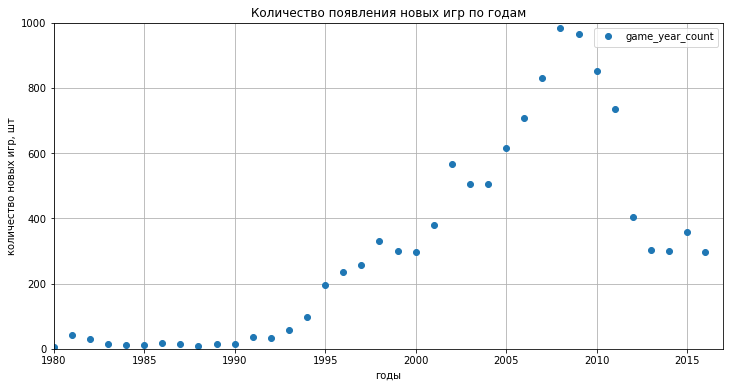

In [68]:
grouped_name_year_count.plot(y='game_year_count', style='o', ylim=(0, 1000), xlim=(1980, 2017), grid=True, figsize=(12, 6))
plt.xlabel('годы')
plt.ylabel('количество новых игр, шт')
plt.title('Количество появления новых игр по годам')
plt.show()

Не так просто, но справился, это количество не существующих игр по годам, а появление именно новых игр по годам. <br/>
Интересен пик 2002 года. У меня версия, что этот пик спровоцирован выпуском в 2001 году первой игровой консоли Xbox от Microsoft. <br/>
https://stevsky.ru/starie-igri/istoriya-razvitiya-igr-ot-pervich-igr-do-virtualnoy-realnosti


Важны ли данные за все периоды? Смотря для чего? Для прогноза на 2017 год, думаю - хватит данных и за последние пять лет.

И мне интересно посмотреть лидера по играм за все времена ))

In [69]:
games_data_sales_alltime = games_data.groupby(
    'name').agg(total_sales=('total_sales','sum'))
games_data_sales_alltime = games_data_sales_alltime.sort_values('total_sales', ascending = False)
display(games_data_sales_alltime)

,total_sales
name,
wii sports,82.54
grand theft auto v,56.58
super mario bros.,45.31
tetris,35.84
mario kart wii,35.52
...,...
crows: burning edge,0.01
elven legacy collection,0.01
pro angler moves,0.01


In [70]:
display(games_data_sales_alltime.head(10))

,total_sales
name,
wii sports,82.54
grand theft auto v,56.58
super mario bros.,45.31
tetris,35.84
mario kart wii,35.52
wii sports resort,32.77
pokemon red/pokemon blue,31.38
call of duty: black ops,30.82
call of duty: modern warfare 3,30.60


82,5 млн.копий - не так густо для одной игры...  Интересна достоверность данных этого датасета... <br/>
И tetris на почетном четвертом месте, что радует )) Это единственная игра, где я играл сам ))

<a name="chapter_3.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.3. Изменение продаж игр по платформам.</b> <br/>
</div>

In [71]:
games_data_sales = games_data.groupby(
    'platform').agg(na_sales=('na_sales','sum'), eu_sales=('eu_sales','sum'), jp_sales=(
    'jp_sales','sum'), other_sales=('other_sales','sum'), total_sales=('total_sales','sum'))
games_data_sales = games_data_sales.sort_values('total_sales', ascending = False)
display(games_data_sales)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
ps2,583.84,339.29,139.20,193.44,1255.77
x360,602.47,270.76,12.43,85.76,971.42
ps3,393.49,330.29,80.19,135.68,939.65
wii,496.90,262.21,69.33,79.07,907.51
ds,382.40,188.89,175.57,59.26,806.12
ps,336.52,213.61,139.82,40.91,730.86
gba,187.54,75.25,47.33,7.73,317.85
ps4,108.74,141.09,15.96,48.35,314.14
psp,109.17,66.68,76.78,41.42,294.05


- Безусловным лидером за этот период является ps2. А вот лидером на премиальном na-рынке является x360<br/>
- В лидирующей группе можно выделить шесть платформ, продажи игр на шестой ps превосходят продажи седьмой позиции gba более, чем в два раза. Насколько я уже вижу, 3 из 4 последних - это платформы изготовления Японии. <br/>
https://ru.wikipedia.org/wiki/PC_Engine <br/>
https://ru.wikipedia.org/wiki/3DO_Interactive_Multiplayer <br/>
https://ru.wikipedia.org/wiki/PC-FX <br/>

И интересно мне выделить еще последние 3 года плюс неполный 2016, посмотреть, кто лидер за последние годы.

In [72]:
games_data_sales_5 = games_data.query('year_of_release >= 2014 & year_of_release <= 2016')
games_data_sales = games_data_sales_5.groupby(
    'platform').agg(na_sales=('na_sales','sum'), eu_sales=('eu_sales','sum'), jp_sales=(
    'jp_sales','sum'), other_sales=('other_sales','sum'), total_sales=('total_sales','sum'))
games_data_sales = games_data_sales.sort_values('total_sales', ascending = False)
display(games_data_sales)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
ps4,98.61,130.04,15.02,44.48,288.15
xone,81.27,46.25,0.32,12.52,140.36
3ds,22.64,16.12,44.24,3.68,86.68
ps3,22.05,25.54,11.22,9.37,68.18
x360,28.30,15.49,0.08,4.35,48.22
wiiu,19.36,13.15,7.31,3.16,42.98
pc,7.23,17.97,0.00,1.85,27.05
psv,2.52,3.53,14.54,1.81,22.40
wii,2.08,2.59,0.00,0.40,5.07


<a name="chapter_3.4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.4. Время жизни игровых платформ.</b> <br/>
</div>

Список наиболее успешных игровых платформ за все время получили в предыдущем пункте, это - ps2, x360, ps3, wii, ds, ps. Добавим к нему еще две самые успешные платформы последних лет. Это ps4 и xone.

Хотел бы сделать в цикле и на одном графике, но как-то не справился с отображением. Нет еще достаточных знаний по графикам. <br/>
Понимаю, что это неспортивно ))<br/>
Но по причине этих курсов у меня образовалась некая катастрофа с временными ресурсами... Основную-то мою работу никто не отменял ))

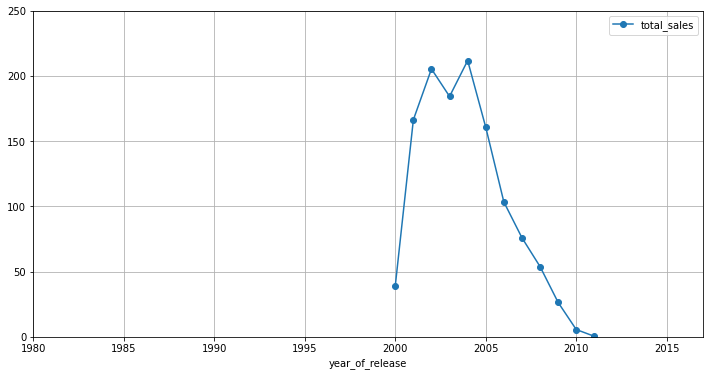

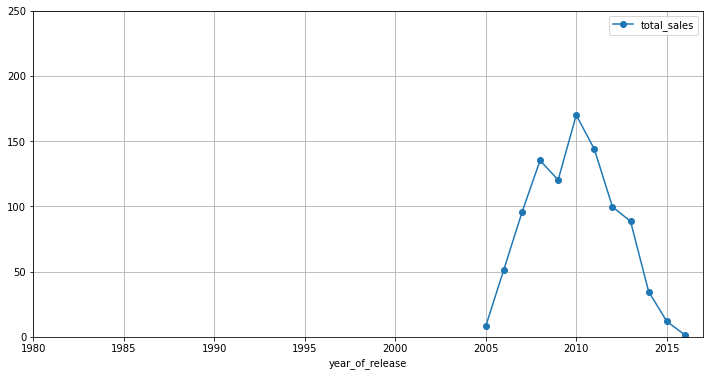

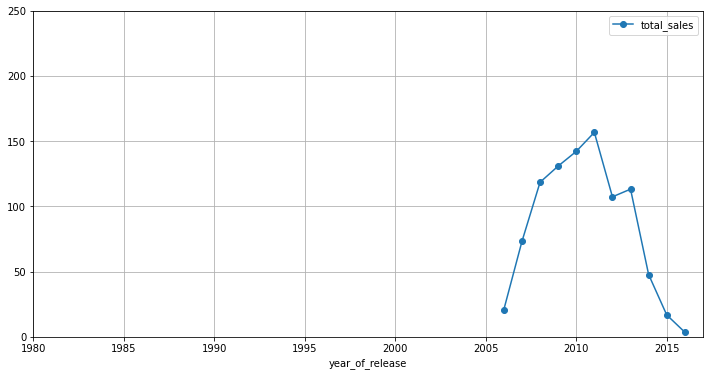

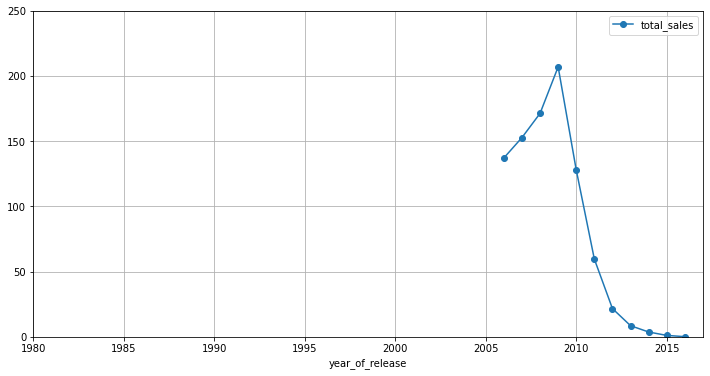

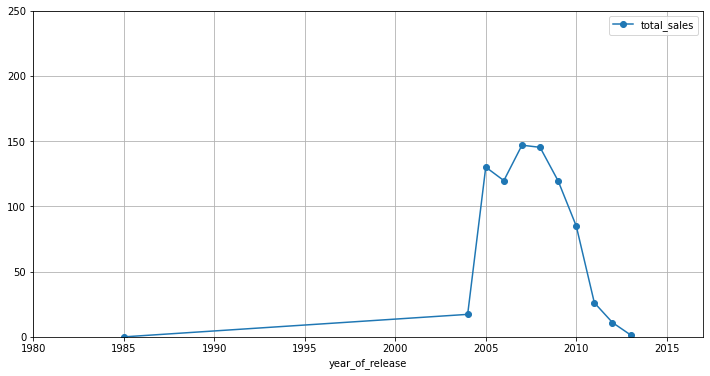

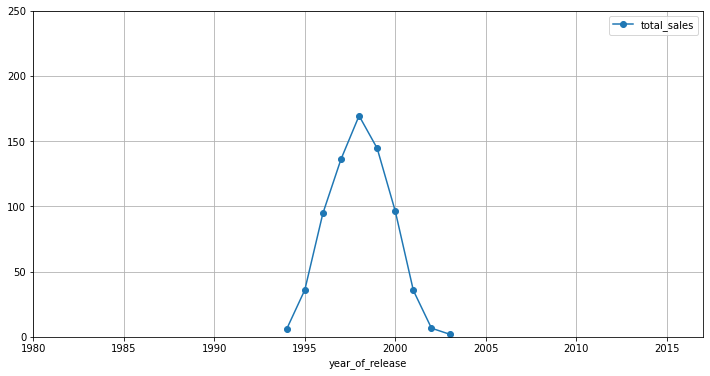

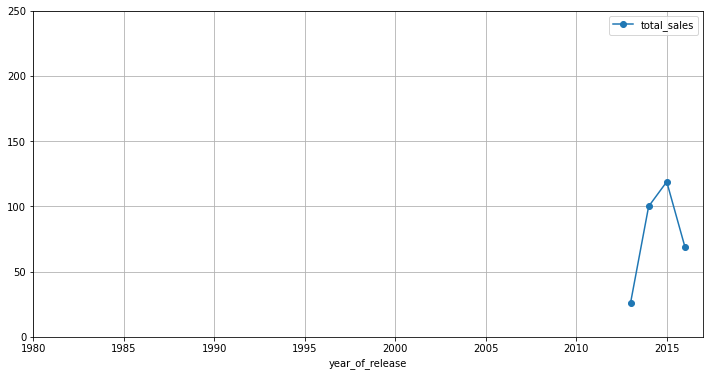

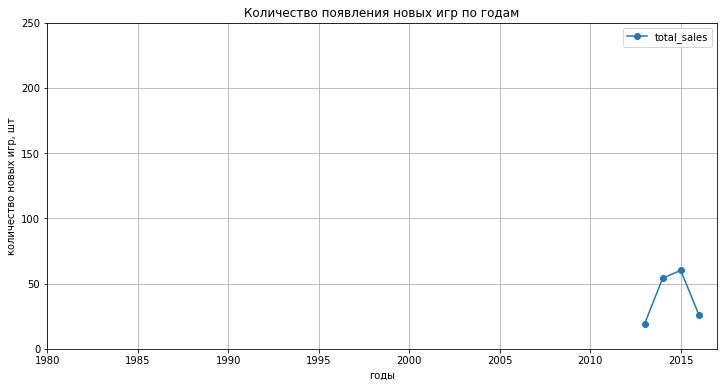

In [73]:
for plat in ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'xone']:
    games_data_sales_platform = games_data.query('platform == @plat & year_of_release != -1')
    games_data_sales_platform = games_data_sales_platform.groupby('year_of_release').agg(total_sales=('total_sales','sum'))
    games_data_sales_platform.plot(y='total_sales', style='o-', ylim=(0, 250), xlim=(1980, 2017), grid=True, figsize=(12, 6))
plt.xlabel('годы')
plt.ylabel('количество новых игр, шт')
plt.title('Количество появления новых игр по годам')
plt.show()

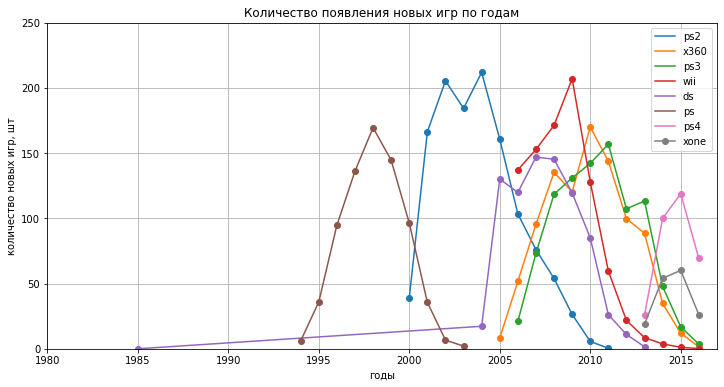

In [74]:
location = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'xone']
i = 0
fig, ax = plt.subplots()
for plat in location:
    games_data_sales_platform = games_data.query('platform == @plat & year_of_release != -1')
    games_data_sales_platform = games_data_sales_platform.groupby('year_of_release').agg(total_sales=('total_sales','sum'))
    games_data_sales_platform.plot(y='total_sales', style='o-', ylim=(0, 250), xlim=(1980, 2017), grid=True, figsize=(12, 6), label = location[i], ax=ax)
    i += 1
plt.xlabel('годы')
plt.ylabel('количество новых игр, шт')
plt.title('Количество появления новых игр по годам')
plt.show()
#https://pyprog.pro/mpl/mpl_adding_a_legend.html

Поэтому только так:

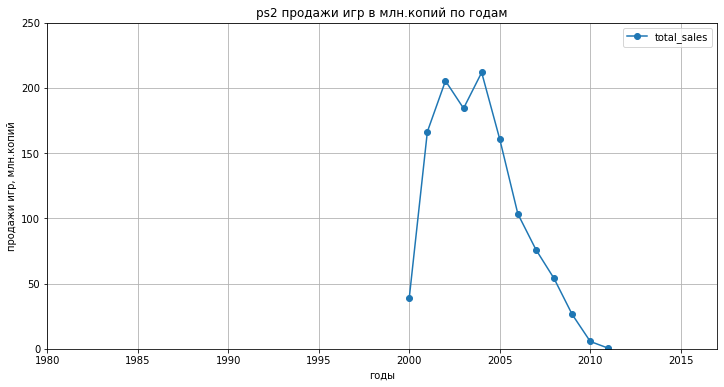

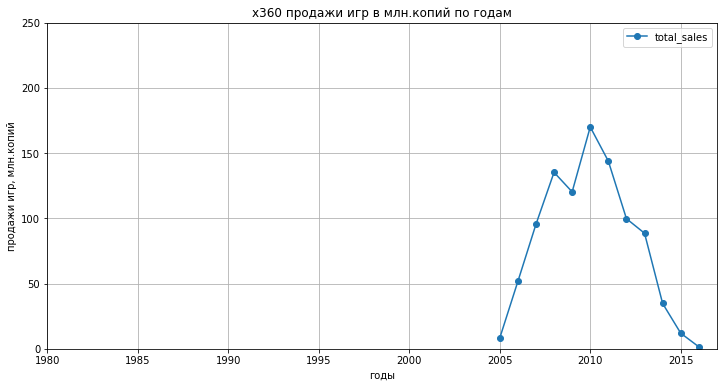

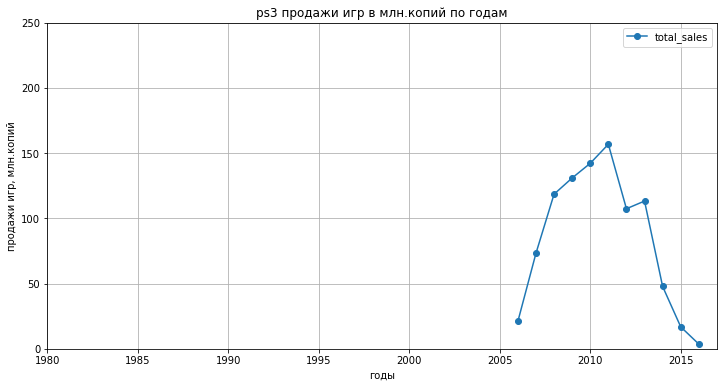

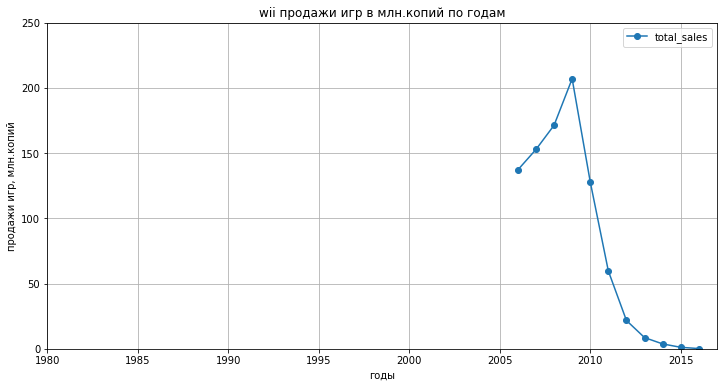

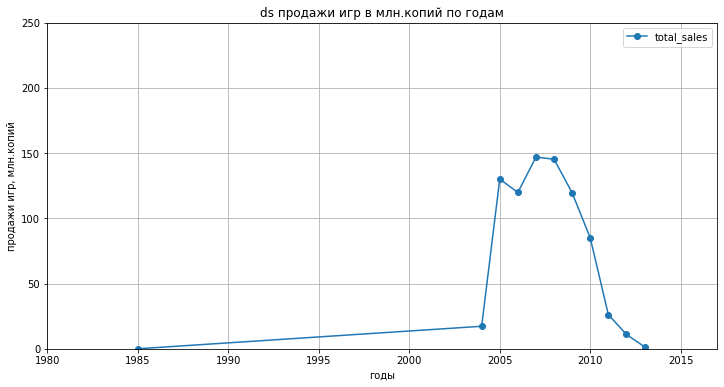

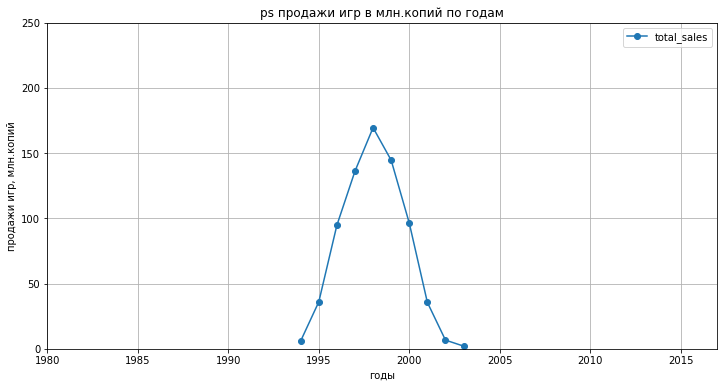

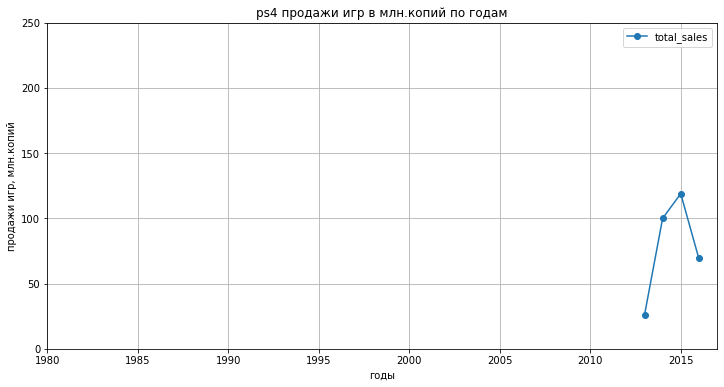

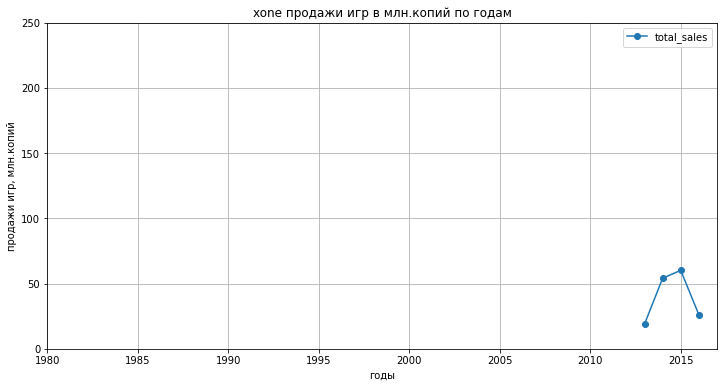

In [75]:
games_data_sales_platform = games_data.query('platform == "ps2" & year_of_release != -1')
games_data_sales_platform_total_ps2 = games_data_sales_platform.groupby('year_of_release').agg(total_sales=('total_sales','sum'))
games_data_sales_platform = games_data.query('platform == "x360" & year_of_release != -1')
games_data_sales_platform_total_x360 = games_data_sales_platform.groupby('year_of_release').agg(total_sales=('total_sales','sum'))
games_data_sales_platform = games_data.query('platform == "ps3" & year_of_release != -1')
games_data_sales_platform_total_ps3 = games_data_sales_platform.groupby('year_of_release').agg(total_sales=('total_sales','sum'))
games_data_sales_platform = games_data.query('platform == "wii" & year_of_release != -1')
games_data_sales_platform_total_wii = games_data_sales_platform.groupby('year_of_release').agg(total_sales=('total_sales','sum'))
games_data_sales_platform = games_data.query('platform == "ds" & year_of_release != -1')
games_data_sales_platform_total_ds = games_data_sales_platform.groupby('year_of_release').agg(total_sales=('total_sales','sum'))
games_data_sales_platform = games_data.query('platform == "ps" & year_of_release != -1')
games_data_sales_platform_total_ps = games_data_sales_platform.groupby('year_of_release').agg(total_sales=('total_sales','sum'))
games_data_sales_platform = games_data.query('platform == "ps4" & year_of_release != -1')
games_data_sales_platform_total_ps4 = games_data_sales_platform.groupby('year_of_release').agg(total_sales=('total_sales','sum'))
games_data_sales_platform = games_data.query('platform == "xone" & year_of_release != -1')
games_data_sales_platform_total_xone = games_data_sales_platform.groupby('year_of_release').agg(total_sales=('total_sales','sum'))

games_data_sales_platform_total_ps2.plot(y='total_sales', style='o-', ylim=(0, 250), xlim=(1980, 2017), grid=True, figsize=(12, 6))
plt.xlabel('годы')
plt.ylabel('продажи игр, млн.копий')
plt.title('ps2 продажи игр в млн.копий по годам')
plt.show()
games_data_sales_platform_total_x360.plot(y='total_sales', style='o-', ylim=(0, 250), xlim=(1980, 2017), grid=True, figsize=(12, 6))
plt.xlabel('годы')
plt.ylabel('продажи игр, млн.копий')
plt.title('x360 продажи игр в млн.копий по годам')
plt.show()
games_data_sales_platform_total_ps3.plot(y='total_sales', style='o-', ylim=(0, 250), xlim=(1980, 2017), grid=True, figsize=(12, 6))
plt.xlabel('годы')
plt.ylabel('продажи игр, млн.копий')
plt.title('ps3 продажи игр в млн.копий по годам')
plt.show()
games_data_sales_platform_total_wii.plot(y='total_sales', style='o-', ylim=(0, 250), xlim=(1980, 2017), grid=True, figsize=(12, 6))
plt.xlabel('годы')
plt.ylabel('продажи игр, млн.копий')
plt.title('wii продажи игр в млн.копий по годам')
plt.show()
games_data_sales_platform_total_ds.plot(y='total_sales', style='o-', ylim=(0, 250), xlim=(1980, 2017), grid=True, figsize=(12, 6))
plt.xlabel('годы')
plt.ylabel('продажи игр, млн.копий')
plt.title('ds продажи игр в млн.копий по годам')
plt.show()
games_data_sales_platform_total_ps.plot(y='total_sales', style='o-', ylim=(0, 250), xlim=(1980, 2017), grid=True, figsize=(12, 6))
plt.xlabel('годы')
plt.ylabel('продажи игр, млн.копий')
plt.title('ps продажи игр в млн.копий по годам')
plt.show()
games_data_sales_platform_total_ps4.plot(y='total_sales', style='o-', ylim=(0, 250), xlim=(1980, 2017), grid=True, figsize=(12, 6))
plt.xlabel('годы')
plt.ylabel('продажи игр, млн.копий')
plt.title('ps4 продажи игр в млн.копий по годам')
plt.show()
games_data_sales_platform_total_xone.plot(y='total_sales', style='o-', ylim=(0, 250), xlim=(1980, 2017), grid=True, figsize=(12, 6))
plt.xlabel('годы')
plt.ylabel('продажи игр, млн.копий')
plt.title('xone продажи игр в млн.копий по годам')
plt.show()

ps2 - 11 лет на рынке, период роста - 4 года, потом спад, последние продажи в 2011 году; <br/>
x360 - 12 лет на рынке, период роста - 5 лет, потом спад, еще живет; <br/>
ps3 - 10 лет на рынке, период роста - 5 лет, потом спад, еще живет; <br/>
wii - 10 лет на рынке, период роста - 3 года, потом спад, еще живет; <br/>
ds - странный старт в 1985 году и нет продаж до 2004 года, потом 9 лет на рынке, период роста - 4 года, потом спад, последние продажи в 2013 году; <br/>
ps - 9 лет на рынке, период роста - 3 года, потом спад, последние продажи в 2003 году; <br/>
ps4 - 3 года на рынке, период роста - пока 2 года, данные по 2016 году неполные, спада может еще и не быть, еще живет. И надо сказать, что по цифрам старта уже уступает ps2; <br/>
xone - 3 года на рынке, период роста - пока 2 года, данные по 2016 году неполные, спада может еще и не быть, еще живет.<br/>

- средний срок жизни игровых платформ порядка 10 лет.
- все они испытывают давление со стороны фактора ухода клиентов в мобильные устройства, это и игры и социальные сети и мессенджеры. Картина похожа на на аналогичные процессы в интернет-среде.
- новые платформы, типа ps4 имеют стартовые показатели уже хуже, чем их лучшие предшественники.
- из задания - "Не учитывайте в работе данные за предыдущие годы.". Не совсем пока понимаю, где это надо будет, но современную историю игровых платформ по датасету можно очертить периодом с 2012 года и по 2016 - некая стабилизация рынка после падения в два раза. И есть тренд дальнейшего падения данного рынка.
- думаю, что это все приведет к катастрофическому ухудшению зрения  и очень ощутимому уменьшению способности к длительной концентрации внимания в offline-жизни у людей.




Сложно судить о прибыльности, затрат мы совершенно не имеем. Но мне интересно сравнить между собой все ps плюс x360. Попробуем построить график «ящика с усами» по глобальным продажам игр в разбивке по этим платформам. <br/>
Вначале подготовим файл с этими данными. 

In [76]:
games_data_sales_platform_box = games_data.query(
    'platform == "ps" | platform == "ps2" | platform == "ps3" | platform == "ps4" | platform == "x360"')

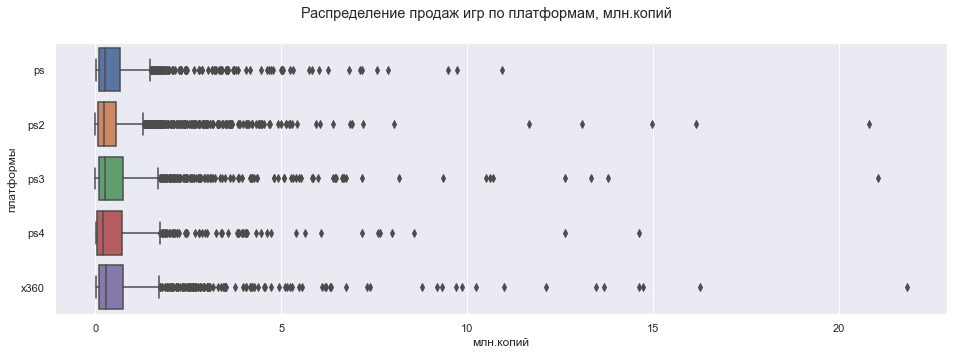

In [77]:
import seaborn as sns        
sns.set(color_codes=True)

fig, axes = plt.subplots(1, figsize=(16, 5))
# Создадим график boxplot для платформ
# Чтобы поменять ориентацию боксплота нужно поменять местами колонки в x/y
sns.boxplot(data=games_data_sales_platform_box.sort_values(by='platform'), x='total_sales', y='platform', ax=axes)

# Добавим подписи для каждой колонки 

axes.set_xlabel('млн.копий')
axes.set_ylabel('платформы');
fig.suptitle('Распределение продаж игр по платформам, млн.копий');

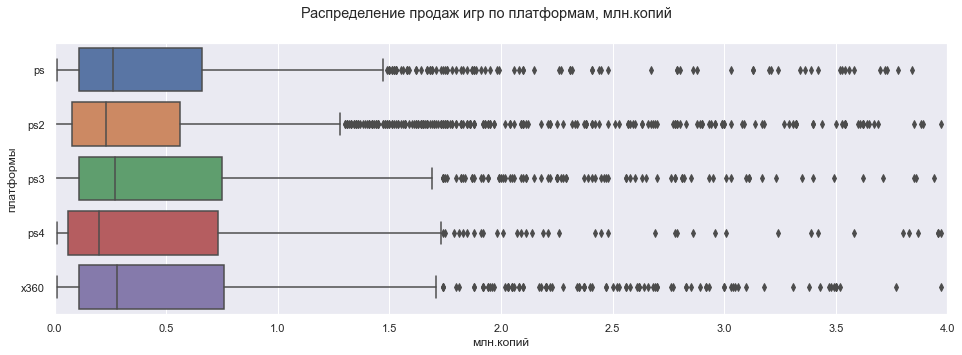

In [78]:

fig, axes = plt.subplots(1, figsize=(16, 5))
# Создадим график boxplot для платформ
# Чтобы поменять ориентацию боксплота нужно поменять местами колонки в x/y
sns.boxplot(data=games_data_sales_platform_box.sort_values(by='platform'), x='total_sales', y='platform', ax=axes)

# Добавим подписи для каждой колонки 
plt.xlim([0, 4]) # попробуем найти ограничение по оси
# И спасибо автору подсказки! https://fooobar.com/questions/17513651/data-limits-and-maximum-distances-for-boxplot-in-pandas-python
axes.set_xlabel('млн.копий')
axes.set_ylabel('платформы');
fig.suptitle('Распределение продаж игр по платформам, млн.копий');

Медианное значение выше у ps3 и x360. И у всех большая часть значений стоит выше медианного значения. Стало быть успешность платформ определяется именно успешностью хвоста. Чем бОльший процент успешных игр, тем выше шансы на успех платформы.

А ps2 жила в самое лучшее время для игровых платформ.

<a name="chapter_3.5."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.5. Влияние отзывов пользователей и критиков на продажи игровых платформ.</b> <br/>
</div>

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Посмотрим ps2, x360 и ps4 и уберем из рассмотрения отсутствующие данные по отзывам и оценкам critic_score и	user_score.

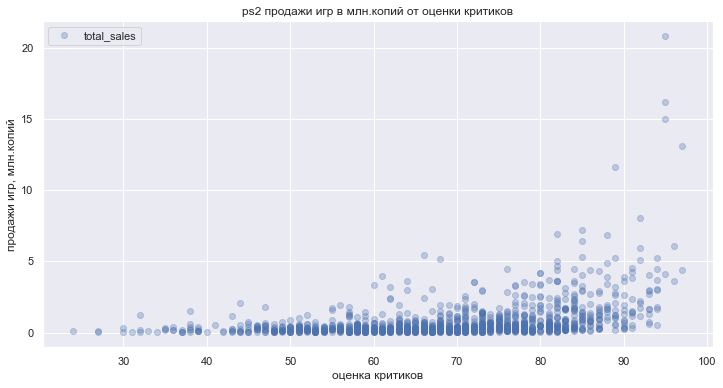

In [79]:
games_data_sales_platform_score = games_data.query('critic_score != -1')
#display(games_data_sales_platform_score)
games_score_ps2 = games_data_sales_platform_score.query('platform == "ps2"')
#display(games_score_ps2)
games_score_ps2.plot(x='critic_score', y='total_sales', style='o', figsize=(12,6), alpha=0.3)
plt.xlabel('оценка критиков')
plt.ylabel('продажи игр, млн.копий')
plt.title('ps2 продажи игр в млн.копий от оценки критиков')
plt.show()

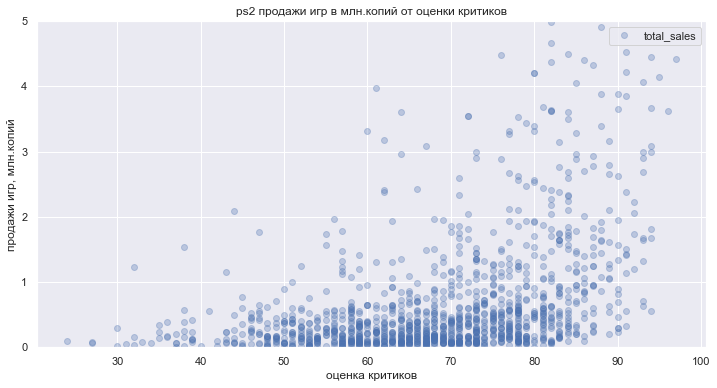

In [80]:
games_data_sales_platform_score = games_data.query('critic_score != -1')
#display(games_data_sales_platform_score)
games_score_ps2 = games_data_sales_platform_score.query('platform == "ps2"')
#display(games_score_ps2)
games_score_ps2.plot(x='critic_score', y='total_sales', style='o', figsize=(12,6), alpha=0.3)

plt.ylim([0, 5]) # ограничим область отображения

plt.xlabel('оценка критиков')
plt.ylabel('продажи игр, млн.копий')
plt.title('ps2 продажи игр в млн.копий от оценки критиков')
plt.show()


На глаз зависимость есть, посчитаем еще коэффициент Пирсона

In [81]:
display(games_score_ps2['critic_score'].corr(games_score_ps2['total_sales'])) # посчитаем коэффициент Пирсона

0.39543454945454876

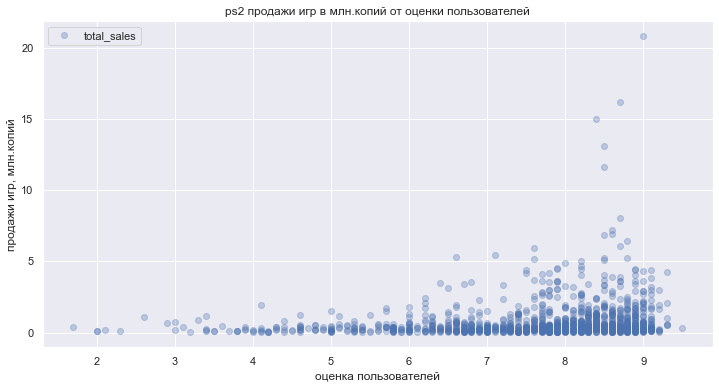

In [82]:
games_data_sales_platform_score = games_data.query('user_score != -1')
#display(games_data_sales_platform_score)
games_score_ps2 = games_data_sales_platform_score.query('platform == "ps2"')
#display(games_score_ps2)
games_score_ps2.plot(x='user_score', y='total_sales', style='o', figsize=(12,6), alpha=0.3)
plt.xlabel('оценка пользователей')
plt.ylabel('продажи игр, млн.копий')
plt.title('ps2 продажи игр в млн.копий от оценки пользователей')
plt.show()

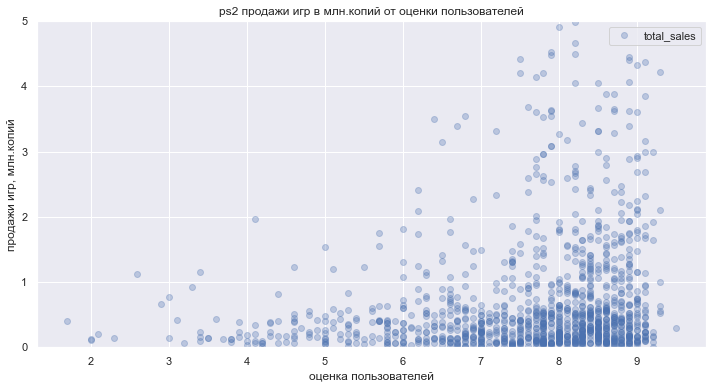

In [83]:
games_data_sales_platform_score = games_data.query('user_score != -1')
#display(games_data_sales_platform_score)
games_score_ps2 = games_data_sales_platform_score.query('platform == "ps2"')
#display(games_score_ps2)
games_score_ps2.plot(x='user_score', y='total_sales', style='o', figsize=(12,6), alpha=0.3)

plt.ylim([0, 5]) # ограничим область отображения

plt.xlabel('оценка пользователей')
plt.ylabel('продажи игр, млн.копий')
plt.title('ps2 продажи игр в млн.копий от оценки пользователей')
plt.show()

In [84]:
display(games_score_ps2['user_score'].corr(games_score_ps2['total_sales'])) # посчитаем коэффициент Пирсона

0.1728655111205822

Получается, что зависимость  у платформы ps2 есть, но не особо сильная. И оценка критиков влияет больше, чем оценка пользователей.

Смотрим ps4.

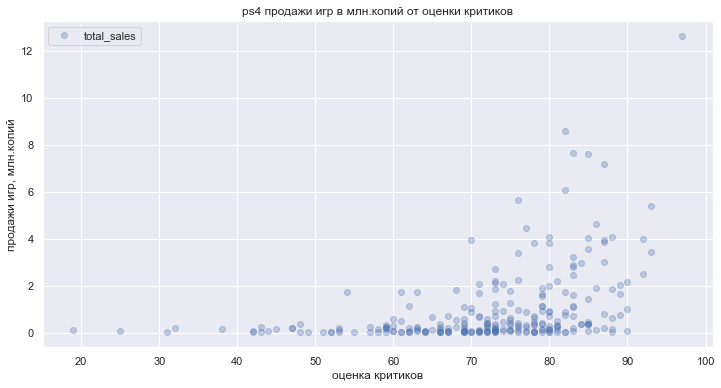

In [85]:
games_data_sales_platform_score = games_data.query('critic_score != -1')
#display(games_data_sales_platform_score)
games_score_ps4 = games_data_sales_platform_score.query('platform == "ps4"')
#display(games_score_ps4)
games_score_ps4.plot(x='critic_score', y='total_sales', style='o', figsize=(12,6), alpha=0.3)
plt.xlabel('оценка критиков')
plt.ylabel('продажи игр, млн.копий')
plt.title('ps4 продажи игр в млн.копий от оценки критиков')
plt.show()

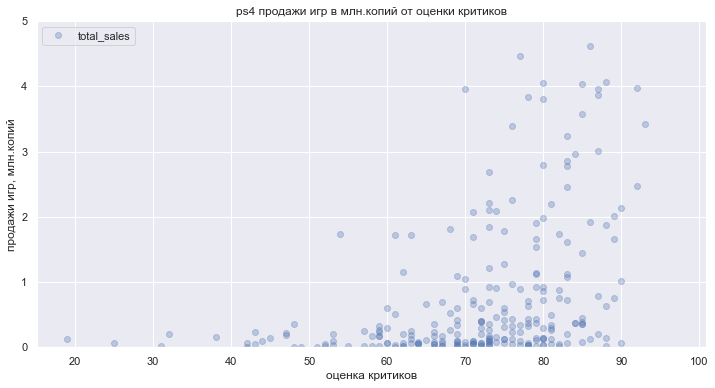

In [86]:
games_data_sales_platform_score = games_data.query('critic_score != -1')
#display(games_data_sales_platform_score)
games_score_ps4 = games_data_sales_platform_score.query('platform == "ps4"')
#display(games_score_ps4)
games_score_ps4.plot(x='critic_score', y='total_sales', style='o', figsize=(12,6), alpha=0.3)

plt.ylim([0, 5]) # ограничим область отображения

plt.xlabel('оценка критиков')
plt.ylabel('продажи игр, млн.копий')
plt.title('ps4 продажи игр в млн.копий от оценки критиков')
plt.show()

In [87]:
display(games_score_ps4['critic_score'].corr(games_score_ps4['total_sales'])) # посчитаем коэффициент Пирсона

0.40656790206178095

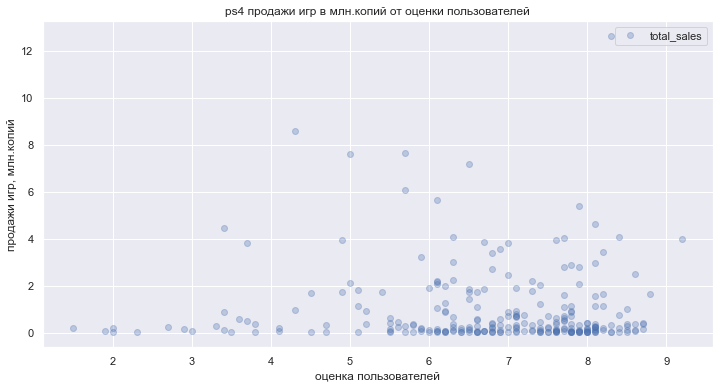

In [88]:
games_data_sales_platform_score = games_data.query('user_score != -1')
#display(games_data_sales_platform_score)
games_score_ps4 = games_data_sales_platform_score.query('platform == "ps4"')
#display(games_score_ps4)
games_score_ps4.plot(x='user_score', y='total_sales', style='o', figsize=(12,6), alpha=0.3)
plt.xlabel('оценка пользователей')
plt.ylabel('продажи игр, млн.копий')
plt.title('ps4 продажи игр в млн.копий от оценки пользователей')
plt.show()

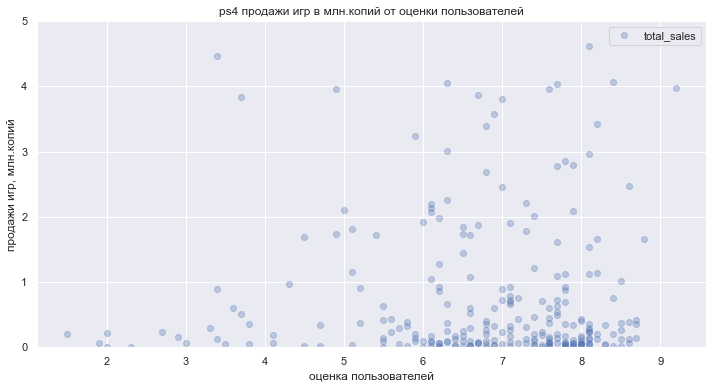

In [89]:
games_data_sales_platform_score = games_data.query('user_score != -1')
#display(games_data_sales_platform_score)
games_score_ps4 = games_data_sales_platform_score.query('platform == "ps4"')
#display(games_score_ps4)
games_score_ps4.plot(x='user_score', y='total_sales', style='o', figsize=(12,6), alpha=0.3)

plt.ylim([0, 5]) # ограничим область отображения

plt.xlabel('оценка пользователей')
plt.ylabel('продажи игр, млн.копий')
plt.title('ps4 продажи игр в млн.копий от оценки пользователей')
plt.show()

In [90]:
display(games_score_ps4['user_score'].corr(games_score_ps4['total_sales'])) # посчитаем коэффициент Пирсона

-0.031957110204556376

Интересные данные для новой платформы получили, но вначале посмотрим по платфоме x360.

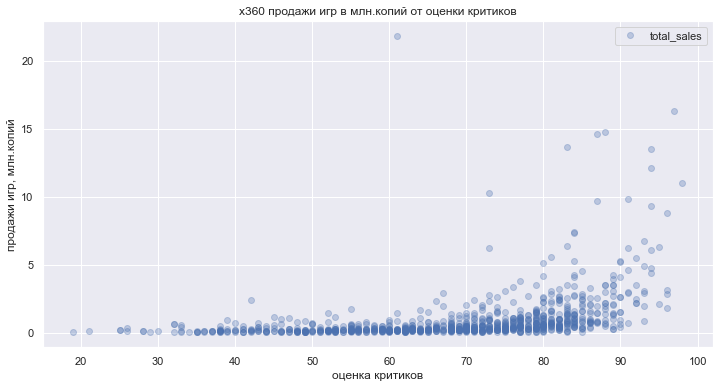

In [91]:
games_data_sales_platform_score = games_data.query('critic_score != -1')
#display(games_data_sales_platform_score)
games_score_x360 = games_data_sales_platform_score.query('platform == "x360"')
#display(games_score_x360)
games_score_x360.plot(x='critic_score', y='total_sales', style='o', figsize=(12,6), alpha=0.3)
plt.xlabel('оценка критиков')
plt.ylabel('продажи игр, млн.копий')
plt.title('x360 продажи игр в млн.копий от оценки критиков')
plt.show()

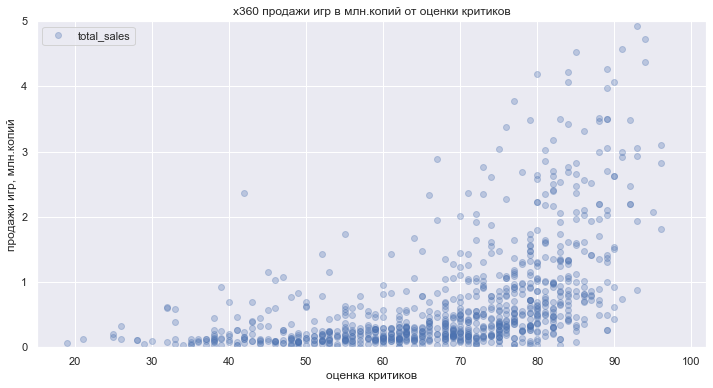

In [92]:
games_data_sales_platform_score = games_data.query('critic_score != -1')
#display(games_data_sales_platform_score)
games_score_x360 = games_data_sales_platform_score.query('platform == "x360"')
#display(games_score_x360)
games_score_x360.plot(x='critic_score', y='total_sales', style='o', figsize=(12,6), alpha=0.3)

plt.ylim([0, 5]) # ограничим область отображения

plt.xlabel('оценка критиков')
plt.ylabel('продажи игр, млн.копий')
plt.title('x360 продажи игр в млн.копий от оценки критиков')
plt.show()

In [93]:
display(games_score_x360['critic_score'].corr(games_score_x360['total_sales'])) # посчитаем коэффициент Пирсона

0.39373586530725835

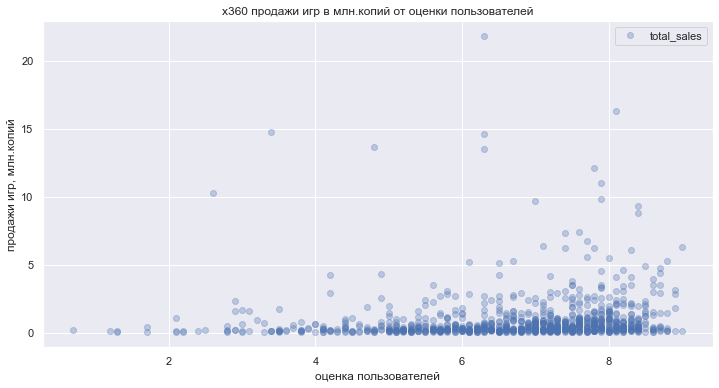

In [94]:
games_data_sales_platform_score = games_data.query('user_score != -1')
#display(games_data_sales_platform_score)
games_score_x360 = games_data_sales_platform_score.query('platform == "x360"')
#display(games_score_x360)
games_score_x360.plot(x='user_score', y='total_sales', style='o', figsize=(12,6), alpha=0.3)
plt.xlabel('оценка пользователей')
plt.ylabel('продажи игр, млн.копий')
plt.title('x360 продажи игр в млн.копий от оценки пользователей')
plt.show()

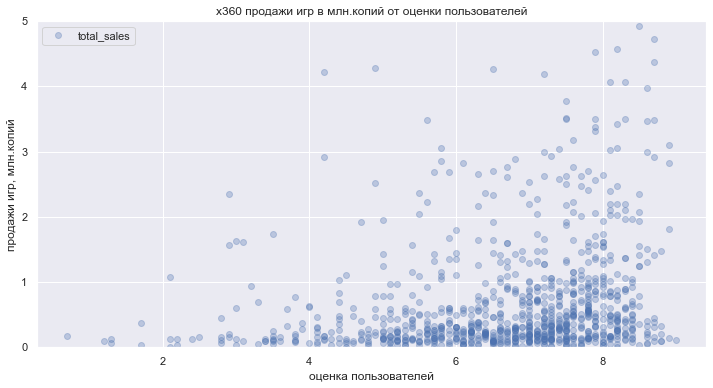

In [95]:
games_data_sales_platform_score = games_data.query('user_score != -1')
#display(games_data_sales_platform_score)
games_score_x360 = games_data_sales_platform_score.query('platform == "x360"')
#display(games_score_x360)
games_score_x360.plot(x='user_score', y='total_sales', style='o', figsize=(12,6), alpha=0.3)

plt.ylim([0, 5]) # ограничим область отображения

plt.xlabel('оценка пользователей')
plt.ylabel('продажи игр, млн.копий')
plt.title('x360 продажи игр в млн.копий от оценки пользователей')
plt.show()

In [96]:
display(games_score_x360['user_score'].corr(games_score_x360['total_sales'])) # посчитаем коэффициент Пирсона

0.11445882978454182

Коэффициент Пирсона для трех разных платформ, зависимость уровня продаж в млн.копий от оценок критиков и пользователей.

ps2 оценка критиков- 0.39543454945454876 <br/>
ps2 оценка пользователей - 0.1728655111205822

ps4 оценка критиков- 0.40656790206178095<br/>
ps4 оценка пользователей - -0.031957110204556376

x360 оценка критиков- 0.39373586530725835<br/>
x360 оценка пользователей - 0.11445882978454182

- есть умеренная корреляция от оценок критиков
- на начальном этапе многое в судьбе игры зависит именно от оценок критиков
- корреляция с оценками пользователей гораздо слабее, на начальном этапе игры она может и отсутствовать
- без высоких оценок критиков маловероятно ожидать относительно высоких продаж. А вот без высоких оценок пользователей они возможны. Думаю, в оценках пользователей гораздо больше субъективного и, главное, гораздо больше эмоций. А эмоциональная оценка часто ставится довольно несправедливо.


<a name="chapter_3.6."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.6. Распределение игр по жанрам.</b> <br/>
</div>

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

И сразу посчитаем не только сумму продаж в млн.копий, но и посчитаем общее количество игр и общее количество продаж в пересчете на одну игру.

In [97]:
games_data_sales_genre = games_data.query('genre != "nog"')
#display(games_data_sales_genre)
games_data_sales_genre = games_data_sales_genre.groupby(
    'genre').agg(na_sales=('na_sales','sum'), eu_sales=('eu_sales','sum'), jp_sales=(
    'jp_sales','sum'), other_sales=('other_sales','sum'), total_sales=('total_sales','sum'), total_count=('name','count'))
games_data_sales_genre = games_data_sales_genre.sort_values('total_sales', ascending = False)
#display(games_data_sales_genre)
games_data_sales_genre['total_1_game'] = games_data_sales_genre['total_sales'] / games_data_sales_genre['total_count']
display(games_data_sales_genre)

,na_sales,eu_sales,jp_sales,other_sales,total_sales,total_count,total_1_game
genre,,,,,,,
action,879.01,519.13,161.43,184.60,1744.17,3369,0.52
sports,684.43,376.79,135.54,134.51,1331.27,2348,0.57
shooter,592.24,317.34,38.76,104.11,1052.45,1323,0.80
role-playing,330.81,188.71,355.41,59.63,934.56,1498,0.62
platform,445.50,200.35,130.83,51.09,827.77,888,0.93
misc,407.27,212.74,108.11,74.39,802.51,1750,0.46
racing,359.35,236.51,56.71,76.10,728.67,1249,0.58
fighting,223.36,100.33,87.48,36.36,447.53,849,0.53
simulation,181.92,113.52,63.80,30.73,389.97,873,0.45


И возьмем более современный срез по годам

In [98]:
games_data_sales_genre_new = games_data.query('genre != "nog" & year_of_release >= 2014 & year_of_release <= 2016')
#display(games_data_sales_genre)
games_data_sales_genre_new = games_data_sales_genre_new.groupby(
    'genre').agg(na_sales=('na_sales','sum'), eu_sales=('eu_sales','sum'), jp_sales=(
    'jp_sales','sum'), other_sales=('other_sales','sum'), total_sales=('total_sales','sum'), total_count=('name','count'))
games_data_sales_genre_new = games_data_sales_genre_new.sort_values('total_sales', ascending = False)
#display(games_data_sales_genre_new)
games_data_sales_genre_new['total_1_game'] = games_data_sales_genre_new['total_sales'] / games_data_sales_genre_new['total_count']
display(games_data_sales_genre_new)

,na_sales,eu_sales,jp_sales,other_sales,total_sales,total_count,total_1_game
genre,,,,,,,
action,72.53,74.68,29.58,22.57,199.36,619,0.32
shooter,79.02,65.52,4.87,21.53,170.94,128,1.34
sports,46.13,45.73,3.26,14.36,109.48,161,0.68
role-playing,33.47,28.17,31.16,8.64,101.44,221,0.46
misc,15.05,12.86,5.61,4.03,37.55,113,0.33
fighting,12.43,6.69,6.37,2.73,28.22,60,0.47
racing,8.74,14.13,1.76,2.89,27.52,69,0.40
platform,6.79,6.80,2.69,1.81,18.09,38,0.48
adventure,5.64,6.49,3.60,1.82,17.55,185,0.09


- по общему количеству продаж и по количеству игр лидирует жанр action. Но заметим, что несмотря на свою лидирующую позицию,  игры жанра action стали уже значимо проигрывать по нормированным продажам на одну игру и shooter, лидеру в последние годы, и еще  шести жанрам. Это может говорить о том, что инвестиции в жанр action становятся проблематичными. Хотя выводов без себестоимости делать нельзя.
- в отстающих strategy и puzzle, но делать выводы по ним можно только на игровых платформах. Да и себестоимость этих игр должна быть значимо ниже. И, думаю, в их судьбе на платформах ныне сильно сказывается то, что их достаточно легко организовать и на мобильных устройствах без особого ухудшения комфортности игры.


In [99]:
games_data_sales_shooter = games_data.query('genre == "shooter" & year_of_release >= 2014 & year_of_release <= 2016')
#display(games_data_sales_shooter.head(10))
games_data_sales_shooter = games_data_sales_shooter.groupby(
    'name').agg(total_sales=('total_sales','sum'))
games_data_sales_shooter = games_data_sales_shooter.sort_values('total_sales', ascending = False)
display(games_data_sales_shooter.head(10))

,total_sales
name,
call of duty: black ops 3,25.67
call of duty: advanced warfare,21.97
destiny,12.54
star wars battlefront (2015),12.19
far cry 4,8.50
call of duty: infinite warfare,7.02
battlefield 1,6.70
tom clancy's the division,6.38
uncharted 4: a thief's end,5.39


Было интересно посмотреть, кто у нас лидер по жанру shooter. И, смотрю, что лидер call of duty: black ops 3 в десятку лидеров по всем временам пока не входит, там десятая позиция с продажами в размере 29.80 млн.копий. 

<a name="chapter_4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>4. Портрет пользователя каждого региона.</b> <br/>
</div>

Шаг 4. Составьте портрет пользователя каждого региона <br/>
Определите для пользователя каждого региона (NA, EU, JP):<br/>
Самые популярные платформы (топ-5). Опишите различия в долях продаж.<br/>
Самые популярные жанры (топ-5). Поясните разницу.<br/>
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Вначале все разом, по потом Top5 для каждого региона.

In [100]:
games_data_sales_region = games_data.copy()

total_sum = games_data_sales_region['total_sales'].sum()
total_sum_na_sales = games_data_sales_region['na_sales'].sum()
total_sum_eu_sales = games_data_sales_region['eu_sales'].sum()
total_sum_jp_sales = games_data_sales_region['jp_sales'].sum()
display(total_sum_na_sales, total_sum_eu_sales, total_sum_jp_sales, total_sum)
games_data_sales_region = games_data_sales_region.groupby(
    'platform').agg(na_sales=('na_sales','sum'), eu_sales=('eu_sales','sum'), jp_sales=(
    'jp_sales','sum'), total_sales=('total_sales','sum'))
games_data_sales_region = games_data_sales_region.sort_values('total_sales', ascending = False)
#display(games_data_sales_genre_new)
games_data_sales_region['na_part'] = games_data_sales_region['na_sales'] / total_sum_na_sales
games_data_sales_region['eu_part'] = games_data_sales_region['eu_sales'] / total_sum_eu_sales
games_data_sales_region['jp_part'] = games_data_sales_region['jp_sales'] / total_sum_jp_sales
games_data_sales_region['total_part'] = games_data_sales_region['total_sales'] / total_sum
display(games_data_sales_region)

4402.35

2424.67

1297.37

8915.71

,na_sales,eu_sales,jp_sales,total_sales,na_part,eu_part,jp_part,total_part
platform,,,,,,,,
ps2,583.84,339.29,139.20,1255.77,0.13,0.14,0.11,0.14
x360,602.47,270.76,12.43,971.42,0.14,0.11,0.01,0.11
ps3,393.49,330.29,80.19,939.65,0.09,0.14,0.06,0.11
wii,496.90,262.21,69.33,907.51,0.11,0.11,0.05,0.10
ds,382.40,188.89,175.57,806.12,0.09,0.08,0.14,0.09
ps,336.52,213.61,139.82,730.86,0.08,0.09,0.11,0.08
gba,187.54,75.25,47.33,317.85,0.04,0.03,0.04,0.04
ps4,108.74,141.09,15.96,314.14,0.02,0.06,0.01,0.04
psp,109.17,66.68,76.78,294.05,0.02,0.03,0.06,0.03


Ну и отдельно Top5 для каждого региона по платформам

In [101]:
games_data_sales_region = games_data_sales_region.sort_values('na_sales', ascending = False)
display(games_data_sales_region.head(5))

games_data_sales_region = games_data_sales_region.sort_values('eu_sales', ascending = False)
display(games_data_sales_region.head(5))

games_data_sales_region = games_data_sales_region.sort_values('jp_sales', ascending = False)
display(games_data_sales_region.head(5))

,na_sales,eu_sales,jp_sales,total_sales,na_part,eu_part,jp_part,total_part
platform,,,,,,,,
x360,602.47,270.76,12.43,971.42,0.14,0.11,0.01,0.11
ps2,583.84,339.29,139.20,1255.77,0.13,0.14,0.11,0.14
wii,496.90,262.21,69.33,907.51,0.11,0.11,0.05,0.10
ps3,393.49,330.29,80.19,939.65,0.09,0.14,0.06,0.11
ds,382.40,188.89,175.57,806.12,0.09,0.08,0.14,0.09


,na_sales,eu_sales,jp_sales,total_sales,na_part,eu_part,jp_part,total_part
platform,,,,,,,,
ps2,583.84,339.29,139.20,1255.77,0.13,0.14,0.11,0.14
ps3,393.49,330.29,80.19,939.65,0.09,0.14,0.06,0.11
x360,602.47,270.76,12.43,971.42,0.14,0.11,0.01,0.11
wii,496.90,262.21,69.33,907.51,0.11,0.11,0.05,0.10
ps,336.52,213.61,139.82,730.86,0.08,0.09,0.11,0.08


,na_sales,eu_sales,jp_sales,total_sales,na_part,eu_part,jp_part,total_part
platform,,,,,,,,
ds,382.40,188.89,175.57,806.12,0.09,0.08,0.14,0.09
ps,336.52,213.61,139.82,730.86,0.08,0.09,0.11,0.08
ps2,583.84,339.29,139.20,1255.77,0.13,0.14,0.11,0.14
snes,61.23,19.04,116.55,200.04,0.01,0.01,0.09,0.02
3ds,83.49,61.48,100.67,259.00,0.02,0.03,0.08,0.03


- лидером по продажам в млн.копий по всем регионам является ps2 с объемом в 1255.77 млн.копий и долей в 14%
- лидером по продажам в млн.копий по na региону является x360 с объемом в 602.47 млн.копий и долей в 14%. И как это удалось Xbox 360 от Micrisoft, родной рынок опять же?
- лидером по продажам в млн.копий по eu региону является ps2 с объемом в 339.29 млн.копий и долей в 14%
- лидером по продажам в млн.копий по jp региону является ds с объемом в 175.57 млн.копий и долей в 14%. И да, Nintendo DS на своем родном рынке убрал всех и даже ps2. Думаю, это говорит о консервативности японского рынка. И должен сказать, что впечатление, что японцы в технологиях сильны, есть только на внешних рынках. Внутри Японии все выглядит совсем не так... (личное впечатление от поездки в эту страну)<br/><br/>

- что-то говорит мне, что такое совпадение в доле у победителей - что-то типа пасхального яйца и не вызывает особого доверия к данным этого датасета? ))

По популярным жанрам в отдельных регионах:

In [102]:
games_data_sales_region = games_data.copy()

total_sum = games_data_sales_region['total_sales'].sum()
total_sum_na_sales = games_data_sales_region['na_sales'].sum()
total_sum_eu_sales = games_data_sales_region['eu_sales'].sum()
total_sum_jp_sales = games_data_sales_region['jp_sales'].sum()
display(total_sum_na_sales, total_sum_eu_sales, total_sum_jp_sales, total_sum)
games_data_sales_region = games_data_sales_region.query('genre != "nog"')
games_data_sales_region = games_data_sales_region.groupby(
    'genre').agg(na_sales=('na_sales','sum'), eu_sales=('eu_sales','sum'), jp_sales=(
    'jp_sales','sum'), total_sales=('total_sales','sum'))
games_data_sales_region = games_data_sales_region.sort_values('total_sales', ascending = False)
#display(games_data_sales_genre_new)
games_data_sales_region['na_part'] = games_data_sales_region['na_sales'] / total_sum_na_sales
games_data_sales_region['eu_part'] = games_data_sales_region['eu_sales'] / total_sum_eu_sales
games_data_sales_region['jp_part'] = games_data_sales_region['jp_sales'] / total_sum_jp_sales
games_data_sales_region['total_part'] = games_data_sales_region['total_sales'] / total_sum
display(games_data_sales_region)

4402.35

2424.67

1297.37

8915.71

,na_sales,eu_sales,jp_sales,total_sales,na_part,eu_part,jp_part,total_part
genre,,,,,,,,
action,879.01,519.13,161.43,1744.17,0.20,0.21,0.12,0.20
sports,684.43,376.79,135.54,1331.27,0.16,0.16,0.10,0.15
shooter,592.24,317.34,38.76,1052.45,0.13,0.13,0.03,0.12
role-playing,330.81,188.71,355.41,934.56,0.08,0.08,0.27,0.10
platform,445.50,200.35,130.83,827.77,0.10,0.08,0.10,0.09
misc,407.27,212.74,108.11,802.51,0.09,0.09,0.08,0.09
racing,359.35,236.51,56.71,728.67,0.08,0.10,0.04,0.08
fighting,223.36,100.33,87.48,447.53,0.05,0.04,0.07,0.05
simulation,181.92,113.52,63.80,389.97,0.04,0.05,0.05,0.04


Ну и отдельно Top5 для каждого региона по жанрам:


In [103]:
games_data_sales_region = games_data_sales_region.sort_values('na_sales', ascending = False)
display(games_data_sales_region.head(5))

games_data_sales_region = games_data_sales_region.sort_values('eu_sales', ascending = False)
display(games_data_sales_region.head(5))

games_data_sales_region = games_data_sales_region.sort_values('jp_sales', ascending = False)
display(games_data_sales_region.head(5))

,na_sales,eu_sales,jp_sales,total_sales,na_part,eu_part,jp_part,total_part
genre,,,,,,,,
action,879.01,519.13,161.43,1744.17,0.20,0.21,0.12,0.20
sports,684.43,376.79,135.54,1331.27,0.16,0.16,0.10,0.15
shooter,592.24,317.34,38.76,1052.45,0.13,0.13,0.03,0.12
platform,445.50,200.35,130.83,827.77,0.10,0.08,0.10,0.09
misc,407.27,212.74,108.11,802.51,0.09,0.09,0.08,0.09


,na_sales,eu_sales,jp_sales,total_sales,na_part,eu_part,jp_part,total_part
genre,,,,,,,,
action,879.01,519.13,161.43,1744.17,0.20,0.21,0.12,0.20
sports,684.43,376.79,135.54,1331.27,0.16,0.16,0.10,0.15
shooter,592.24,317.34,38.76,1052.45,0.13,0.13,0.03,0.12
racing,359.35,236.51,56.71,728.67,0.08,0.10,0.04,0.08
misc,407.27,212.74,108.11,802.51,0.09,0.09,0.08,0.09


,na_sales,eu_sales,jp_sales,total_sales,na_part,eu_part,jp_part,total_part
genre,,,,,,,,
role-playing,330.81,188.71,355.41,934.56,0.08,0.08,0.27,0.10
action,879.01,519.13,161.43,1744.17,0.20,0.21,0.12,0.20
sports,684.43,376.79,135.54,1331.27,0.16,0.16,0.10,0.15
platform,445.50,200.35,130.83,827.77,0.10,0.08,0.10,0.09
misc,407.27,212.74,108.11,802.51,0.09,0.09,0.08,0.09


- лидером по продажам в млн.копий по всем регионам является жанр action с объемом в 1744.17 млн.копий и долей в 20%. В тройку входят еще sports и shooter.
- лидером по продажам в млн.копий по na региону является также жанр action с объемом в 879.01 млн.копий и долей в 20%. В тройку также входят еще sports и shooter.
- лидером по продажам в млн.копий по eu региону является action с объемом в 519.13 млн.копий и долей в 27%. В тройку  входят еще action и sports.
- лидером по продажам в млн.копий по jp региону является role-playing с объемом в 355.41 млн.копий и долей в 14%. И меня это как-то не удивляет, очень специфичная страна.

 Разберемся с влиянием рейтинга ESRB на продажи в отдельном регионе

In [104]:
games_data_sales_region = games_data.copy()

total_sum = games_data_sales_region['total_sales'].sum()
total_sum_na_sales = games_data_sales_region['na_sales'].sum()
total_sum_eu_sales = games_data_sales_region['eu_sales'].sum()
total_sum_jp_sales = games_data_sales_region['jp_sales'].sum()
display(total_sum_na_sales, total_sum_eu_sales, total_sum_jp_sales, total_sum)
games_data_sales_region = games_data_sales_region.query('rating != "nor"')
games_data_sales_region = games_data_sales_region.groupby(
    'rating').agg(na_sales=('na_sales','sum'), eu_sales=('eu_sales','sum'), jp_sales=(
    'jp_sales','sum'), total_sales=('total_sales','sum'))
games_data_sales_region = games_data_sales_region.sort_values('total_sales', ascending = False)
#display(games_data_sales_genre_new)
games_data_sales_region['na_part'] = games_data_sales_region['na_sales'] / total_sum_na_sales
games_data_sales_region['eu_part'] = games_data_sales_region['eu_sales'] / total_sum_eu_sales
games_data_sales_region['jp_part'] = games_data_sales_region['jp_sales'] / total_sum_jp_sales
games_data_sales_region['total_part'] = games_data_sales_region['total_sales'] / total_sum
display(games_data_sales_region)

4402.35

2424.67

1297.37

8915.71

,na_sales,eu_sales,jp_sales,total_sales,na_part,eu_part,jp_part,total_part
rating,,,,,,,,
e,1295.55,710.52,199.57,2439.84,0.29,0.29,0.15,0.27
t,759.75,427.03,151.40,1493.35,0.17,0.18,0.12,0.17
m,748.48,483.97,64.24,1473.79,0.17,0.20,0.05,0.17
e10+,353.32,188.52,40.20,655.60,0.08,0.08,0.03,0.07
ao,1.26,0.61,0.00,1.96,0.00,0.00,0.00,0.00
ec,1.53,0.11,0.00,1.75,0.00,0.00,0.00,0.00
rp,0.00,0.08,0.00,0.09,0.00,0.00,0.00,0.00


In [105]:
games_data_sales_region = games_data_sales_region.sort_values('na_sales', ascending = False)
display(games_data_sales_region.head(5))

games_data_sales_region = games_data_sales_region.sort_values('eu_sales', ascending = False)
display(games_data_sales_region.head(5))

games_data_sales_region = games_data_sales_region.sort_values('jp_sales', ascending = False)
display(games_data_sales_region.head(5))

,na_sales,eu_sales,jp_sales,total_sales,na_part,eu_part,jp_part,total_part
rating,,,,,,,,
e,1295.55,710.52,199.57,2439.84,0.29,0.29,0.15,0.27
t,759.75,427.03,151.40,1493.35,0.17,0.18,0.12,0.17
m,748.48,483.97,64.24,1473.79,0.17,0.20,0.05,0.17
e10+,353.32,188.52,40.20,655.60,0.08,0.08,0.03,0.07
ec,1.53,0.11,0.00,1.75,0.00,0.00,0.00,0.00


,na_sales,eu_sales,jp_sales,total_sales,na_part,eu_part,jp_part,total_part
rating,,,,,,,,
e,1295.55,710.52,199.57,2439.84,0.29,0.29,0.15,0.27
m,748.48,483.97,64.24,1473.79,0.17,0.20,0.05,0.17
t,759.75,427.03,151.40,1493.35,0.17,0.18,0.12,0.17
e10+,353.32,188.52,40.20,655.60,0.08,0.08,0.03,0.07
ao,1.26,0.61,0.00,1.96,0.00,0.00,0.00,0.00


,na_sales,eu_sales,jp_sales,total_sales,na_part,eu_part,jp_part,total_part
rating,,,,,,,,
e,1295.55,710.52,199.57,2439.84,0.29,0.29,0.15,0.27
t,759.75,427.03,151.40,1493.35,0.17,0.18,0.12,0.17
m,748.48,483.97,64.24,1473.79,0.17,0.20,0.05,0.17
e10+,353.32,188.52,40.20,655.60,0.08,0.08,0.03,0.07
ao,1.26,0.61,0.00,1.96,0.00,0.00,0.00,0.00


- лидером по продажам в млн.копий по всем регионам является категория  e с объемом в 2439.84 млн.копий и долей в 20%. В тройку входят еще t и m. «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
- лидером по продажам в млн.копий по na региону является также e с объемом в 1295.55 млн.копий и долей в 29%. В тройку также входят еще t и m.
- лидером по продажам в млн.копий по eu региону является e с объемом в 710.52 млн.копий и долей в 29%. В тройку также входят также еще t и m, но на 2-ом уже m.
- лидером по продажам в млн.копий по jp региону является e с объемом в 199.57 млн.копий и долей в 14%. В тройку также входят также еще t и m. Обращает на себя внимание малая доля категории m, всего 5%. Но я думаю, в Японии все играют на уровне m в совсем другие игры, местные и на основе аниме, которые являются популярными.<br/><br/>

- каких-то признаков влияния рейтинга ESRB на продажи в отдельных регионах незаметно.
- да и доля маркированных по рейтингу ESRB на всех рынках не очень высока.



<a name="chapter_5."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>5. Проверка гипотез.</b> <br/>
</div>

Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

<a name="chapter_5.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>5.1. Проверка гипотезы - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.</b> <br/>
</div>

In [106]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


In [107]:
games_data_hyp_1 = games_data.copy()

games_data_hyp_1 = games_data_hyp_1.query('user_score >= 0')
games_data_hyp_1 = games_data_hyp_1.query('platform == "xone" | platform == "pc"')
#display(games_data_hyp_1)

И заодно посмотрим, как соотносятся пользовательские рейтинги по этим двум платформам

In [108]:
games_data_hyp_1.groupby('platform').agg(user_score_mean = (
    'user_score','mean'), user_score_median = ('user_score','median'), user_score_std = (
    'user_score','std'), user_score_sum = ('user_score','sum'), user_score_count = ('user_score','count'))

,user_score_mean,user_score_median,user_score_std,user_score_sum,user_score_count
platform,,,,,
pc,7.06,7.50,1.53,5438.10,770
xone,6.52,6.80,1.38,1186.90,182


Пойдем до конца, уберем выбросы. Для следующей задачи их надо бы убрать. Уберем все, что превышает 75% квантиль. Хотя, не уверен, что это надо делать для рейтингов.

In [109]:
games_data_hyp_1_var_pc = games_data_hyp_1.copy()
games_data_hyp_1_var_pc = games_data_hyp_1_var_pc.query('platform == "pc"')
#quan_5 = games_data_hyp_1_var_pc['user_score'].quantile(0.25) # распределение односторонее, вернее имеет жесткую границу
quan_75 = games_data_hyp_1_var_pc['user_score'].quantile(0.75)
quan_0_75_games_data_hyp_1_var_pc = (games_data_hyp_1_var_pc['user_score'] <= quan_75)

games_data_hyp_1_var_pc = games_data_hyp_1_var_pc.loc[quan_0_75_games_data_hyp_1_var_pc]
games_data_hyp_1_var_pc[['user_score']].describe()

,user_score
count,600.00
mean,6.62
std,1.45
min,1.40
25%,5.80
50%,7.10
75%,7.80
max,8.20


In [110]:
games_data_hyp_1_var_xone = games_data_hyp_1.copy()
games_data_hyp_1_var_xone = games_data_hyp_1_var_xone.query('platform == "xone"')
#quan_5 = games_data_hyp_1_var_xone['user_score'].quantile(0.25) # распределение односторонее, вернее имеет жесткую границу
quan_75 = games_data_hyp_1_var_xone['user_score'].quantile(0.75)
quan_0_75_games_data_hyp_1_var_xone = (games_data_hyp_1_var_xone['user_score'] <= quan_75)

games_data_hyp_1_var_xone = games_data_hyp_1_var_xone.loc[quan_0_75_games_data_hyp_1_var_xone]
games_data_hyp_1_var_xone[['user_score']].describe()

,user_score
count,140.00
mean,6.04
std,1.20
min,1.60
25%,5.50
50%,6.25
75%,6.93
max,7.50


Формулировка гипотез:

- <b>H0 (нулевая гипотеза)</b> - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- <b>H1 (альтернативная гипотеза)</b> - средние пользовательские рейтинги платформ Xbox One и PC отличаются

Проверяем гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, используем t-критерий Стьюдента для независимых выборок, применяем метод scipy.stats.ttest_ind (array1, array2, equal_var). 

In [111]:
alpha = 0.05

In [112]:
results = st.ttest_ind(games_data_hyp_1_var_pc['user_score'], games_data_hyp_1_var_xone['user_score'])


print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.3118654636368196e-05
Отвергаем нулевую гипотезу


<a name="chapter_5.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>5.2. Проверка гипотезы - Средние пользовательские рейтинги жанров Action и Sports разные.</b> <br/>
</div>

In [113]:
games_data_hyp_2 = games_data.copy()

games_data_hyp_2 = games_data_hyp_2.query('user_score >= 0')
games_data_hyp_2 = games_data_hyp_2.query('genre == "action" | genre == "sports"')
#display(games_data_hyp_2)

И заодно посмотрим, как соотносятся пользовательские рейтинги по этим двум жанрам.

In [114]:
games_data_hyp_2.groupby('genre').agg(user_score_mean = (
    'user_score','mean'), user_score_median = ('user_score','median'), user_score_std = (
    'user_score','std'), user_score_sum = ('user_score','sum'), user_score_count = ('user_score','count'))

,user_score_mean,user_score_median,user_score_std,user_score_sum,user_score_count
genre,,,,,
action,7.05,7.40,1.43,12908.90,1830
sports,6.96,7.40,1.61,7678.20,1103


Уберем выбросы. Для следующей задачи их надо бы убрать. Уберем все, что превышает 75% квантиль. Хотя, не уверен, что это надо делать для рейтингов.

In [115]:
games_data_hyp_2_var_action = games_data_hyp_2.copy()
games_data_hyp_2_var_action = games_data_hyp_2_var_action.query('genre == "action"')
#quan_5 = games_data_hyp_2_var_action['user_score'].quantile(0.25) # распределение односторонее, вернее имеет жесткую границу
quan_75 = games_data_hyp_2_var_action['user_score'].quantile(0.75)
quan_0_75_games_data_hyp_2_var_action = (games_data_hyp_2_var_action['user_score'] <= quan_75)

games_data_hyp_2_var_action = games_data_hyp_2_var_action.loc[quan_0_75_games_data_hyp_2_var_action]
games_data_hyp_2_var_action[['user_score']].describe()

,user_score
count,1419.00
mean,6.61
std,1.31
min,0.30
25%,6.00
50%,7.00
75%,7.60
max,8.10


In [116]:
games_data_hyp_2_var_sports = games_data_hyp_2.copy()
games_data_hyp_2_var_sports = games_data_hyp_2_var_sports.query('genre == "sports"')
#quan_5 = games_data_hyp_2_var_sports['user_score'].quantile(0.25) # распределение односторонее, вернее имеет жесткую границу
quan_75 = games_data_hyp_2_var_sports['user_score'].quantile(0.75)
quan_0_75_games_data_hyp_2_var_sports = (games_data_hyp_2_var_sports['user_score'] <= quan_75)

games_data_hyp_2_var_sports = games_data_hyp_2_var_sports.loc[quan_0_75_games_data_hyp_2_var_sports]
games_data_hyp_2_var_sports[['user_score']].describe()

,user_score
count,837.00
mean,6.43
std,1.49
min,0.20
25%,5.70
50%,6.80
75%,7.60
max,8.10


Формулировка гипотез:

- <b>H0 (нулевая гипотеза)</b> - средние пользовательские рейтинги жанров action  и sports одинаковые
- <b>H1 (альтернативная гипотеза)</b> - средние пользовательские рейтинги жанров action  и sports отличаются

Проверяем гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, используем t-критерий Стьюдента для независимых выборок, применяем метод scipy.stats.ttest_ind (array1, array2, equal_var). 


In [117]:
alpha = 0.05

In [118]:
results = st.ttest_ind(games_data_hyp_2_var_action['user_score'], games_data_hyp_2_var_sports['user_score'])


print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0032419802151615953
Отвергаем нулевую гипотезу


Да, средние пользовательские рейтинги жанров action и sports не одинаковые.

<a name="chapter_6."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>6. Выводы.</b> <br/>
</div>

**6.1. Изучение данных из представленного файла данных**<br/>
6.1.1. 16715 строк. Есть пропущенные данные в пяти столбцах. По заданию надо привести к строчным символам названия столбцов.<br/>
6.1.2. Судя по всему, также поступим и со всеми именами в Name, Platform, Genre.<br/>
6.1.3. Уже знаем и мне это интересно, как обычно не имеющего дело с играми - у нас целых 11559 уникальных названий в Name, 31 уникальная Platform и всего 12 уникальных Genre, и пока мне не совсем понятные 96 уникальных User_Score и 8 уникальных Rating.<br/>
6.1.4. Не совсем понятно, зачем тип object для User_Score, если там такое малое количество уникальных значений, и float64 для Critic_Score, если там данные от 13 и до 98. Получается, что пока в мире нет игры с абсолютным рейтингом. Пока название самой встречаемой - Need for Speed: Most Wanted, вижу в первый раз ))
6.1.5. Year_of_Release имеет данные float64, что лучше бы сменить и целых 269 пропущенных значений. Это старые игры? Впрочем, еще узнаем позже, когда рассмотрим более подробно.<br/>
6.1.6. Обращает внимание еще 2 пропущенных Name, надо отсмотреть эти строки.<br/>
6.1.7. И большое количество пропущенных значений в Critic_Score - 8578, User_Score - 6701 и Rating - 6766. Часть можно списать на старый год выпуска игры, часть на то, что Япония - своеобразный рынок, который иногда довольно замкнутый.<br/>
6.1.8. Игры у нас от 1980 (в качестве версии по старым играм) до 2018 года.<br/>
6.1.9. Action самый популярный жанр - 3369, это порядка 20,1%.<br/>
6.1.10. Премиальным рынком по тем временам был в NA_sales с максимальной цифрой в 41.36, затем EU_sales с 28.96, у JP_sales уже 10.22, и на всех остальных всего Other_sales - 10.57. Получается, что без планов зайти на рынок NA нужно несколько раз подумать, прежде, чем стартовать с игровым стартапом. Хотя, впрочем, это только выводы только первого взгляда - могут быть и неправильными.<br/><br/>
**2. Изучение данных конкретных столбцов и предобработка данных**<br/>
**2.1. Столбец name.**<br/>
2.1.1. Произведено переименование столбцов, приведены названия к строчному виду.<br/>
2.1.2. Два пропуска данных совпадают по строкам с двумя же пропусками данных по столбцу genre (где их только опять же два), и можно, судя по всему, без особого ущерба удалить эти строки.<br/>
**2.2. Столбец platform.**<br/>
2.2.1. Столбец можно перевести в строчный вид, хотя жизненной необходимости в этом шаге нет.<br/>
**2.3. Столбец genre.**<br/>
2.3.1. Столбец тоже можно перевести в строчный вид, хотя жизненной необходимости в этом шаге нет.<br/>
**2.4. Столбец rating.**<br/>
2.4.1. Непонятно, что за рейтинг K-A? Стоп, стало понятно - это начальная версия рейтинга «E» («Everyone») — «Для всех»
Версия, что это старые или японские игры не подтвердилась. Версия, что нет рейтинга у неуспешных игр тоже особо не проходит, есть Super Mario Bros. с приличными продажами.<br/>
2.4.2. Лучше бы с NaN в этом столбце ничего не делать. Хотя для удобства можно поставить метку типа nor (нет рейтинга)<br/>
**2.5. Столбец user_score.**<br/>
2.5.1. tbd такое сокращение даже в играх имеет много разных смыслов, но здесь, скорее всего означает сокращение To Be Determined - будет определено.<br/>
2.5.2. Такое массовое отсутствие critic_score, user_score и rating имеет какую-то общую причину. Версией наличия tbd может быть малое количество продаж. Видимо, малое количество продаж не дает необходимого количества оценок или отзывов, на которых user_score формируется.<br/>
2.5.3. Еще версия, что рейтинги и отзывы в основном определяются маркетинговыми усилиями выпускающих и продюссирующих фирм, которых, к сожалению - нет у нас в датасете.<br/>
2.5.4. По столбцу user_score считаю сделать следующее:  нет смысла ни удалять строки, ни делать какие-то определенные замены tbd и NaN, это может исказить картину в целом. Для дальнейшей работы с типом .float в данном столбце и tbd и NaN изменить на информационные метки типа -1<br/>
**2.6. Столбец year_of_release.**<br/>
2.6.1. По столбцу year_of_release:большинство строк с данными, удалять нет смысла. Для дальнейшей работы с типом .int в данном столбце NaN изменить на информационную метку типа -1. Изменить данные на .int<br/>
**2.7. Столбец critic_score.**
2.7.1. Картина, похожая на user_score. По столбцу critic_score считаю сделать следующее: нет смысла ни удалять строки, ни делать какие-то определенные замены NaN, это может исказить картину в целом. Для дальнейшей работы с типом .float в данном столбце NaN изменить на информационные метки типа -1.<br/>
**2.8. Столбцы na_sales, eu_sales, jp_sales и other_sales.**<br/>
2.8.1. Отметим бОльшее количество игр с малыми продажами именно в Японии, что является интересной характеристикой данного совеобразного рынка. Думаю, некоторые игры и не пытаются адаптировать к данному рынку.
По заданию посчитаны суммарные продажи во всех регионах и записаны их в отдельный столбец.<br/>
**2.9. Проведение выбранных изменений по всем столбцам.**<br/>
2.9.1. Приведены к строчному виду все названия. Причем, по делу только в столбце name, а в остальных только для красоты отображения. ))
2.9.2. Не удалили строки с NaN, которые у нас одновременно и в name и в genre, а поставим в этом поле non (нет названия). А в genre изменим на nog. А в rating изменили NaN на nor. И, заодно рейтинг k-a заменили на более новый e.
Заменили в user_score значение tbd на NaN. И далее заменили везде NaN на информационные метки -1 и привели данные в столбцах к нужным форматам, там, где это необходимо.<br/><br/>
**3. Исследовательский анализ данных.**<br/>
**3.1. Изменение продаж игр по годам.**<br/>
3.1.1. Одна из причин - Пентиум начал массово производиться с 1993 года, презентация была в марте того года. Думаю, что подъем пошел с ним. Хотя, на выпуск игр тоже надо время. На диаграмме рывок с 1996 года. И пик в в 2008-2009 г.г. А в 2009 появился iPhone 3GS и уже в июне 2010 года был представлен iPhone 4 с обновлённой операционной системой iOS. Судя по всему, это и послужило массовому оттоку клиентов и, соответственно денег, в мобильный сегмент.<br/>
**3.2. Изменение количества релизов игр по годам.**<br/>
3.2.1. Посчитано количество не существующих игр по годам, а появление именно новых игр по годам.
Интересен пик 2002 года. У меня версия, что этот пик спровоцирован выпуском в 2001 году первой игровой консоли Xbox от Microsoft.<br/>
3.2.1. Посчитаны лидеры по играм в продажах. Лидер wii sports, 82,5 млн.копий - не так густо для одной игры... Интересна достоверность данных этого датасета... И tetris на почетном четвертом месте, что радует )) <br/>
**3.3. Изменение продаж игр по платформам.**<br/>
3.3.1. Безусловным лидером за этот период является ps2. А вот лидером на премиальном na-рынке является x360
В лидирующей группе можно выделить шесть платформ, продажи игр на шестой ps превосходят продажи седьмой позиции gba более, чем в два раза. Насколько я уже вижу, 3 из 4 последних - это платформы изготовления Японии.<br/>
Лидеры по платформам за все время:<br/>
ps2 	с объемом продаж в 	1255.77 млн.копий<br/>
x360 	с объемом продаж в 	971.42<br/>
ps3 	с объемом продаж в 	939.65<br/>
И лидеры за  последние 3 года плюс неполный 2016.<br/>
ps4 	с объемом продаж в 	288.15<br/>
xone 	с объемом продаж в 	140.36<br/>
3ds 	с объемом продаж в 	86.68<br/>
**3.4. Время жизни игровых платформ.**<br/>
3.4.1. ps2 - 11 лет на рынке, период роста - 4 года, потом спад, последние продажи в 2011 году;<br/>
x360 - 12 лет на рынке, период роста - 5 лет, потом спад, еще живет;<br/>
ps3 - 10 лет на рынке, период роста - 5 лет, потом спад, еще живет;<br/>
wii - 10 лет на рынке, период роста - 3 года, потом спад, еще живет;<br/>
ds - странный старт в 1985 году и нет продаж до 2004 года, потом 9 лет на рынке, период роста - 4 года, потом спад, последние продажи в 2013 году;<br/>
ps - 9 лет на рынке, период роста - 3 года, потом спад, последние продажи в 2003 году;<br/>
ps4 - 3 года на рынке, период роста - пока 2 года, данные по 2016 году неполные, спада может еще и не быть, еще живет. И надо сказать, что по цифрам старта уже уступает ps2;<br/>
xone - 3 года на рынке, период роста - пока 2 года, данные по 2016 году неполные, спада может еще и не быть, еще живет.<br/>
3.4.2. Средний срок жизни игровых платформ порядка 10 лет.<br/>
Все они испытывают давление со стороны фактора ухода клиентов в мобильные устройства, это и игры и социальные сети и мессенджеры. Картина похожа на на аналогичные процессы в интернет-среде.<br/>
Новые платформы, типа ps4 имеют стартовые показатели уже хуже, чем их лучшие предшественники.<br/>
Из задания - "Не учитывайте в работе данные за предыдущие годы.". Не совсем пока понимаю, где это надо будет, но современную историю игровых платформ по датасету можно очертить периодом с 2012 года и по 2016 - некая стабилизация рынка после падения в два раза. И есть тренд дальнейшего падения данного рынка.<br/>
Думаю, что это все приведет к катастрофическому ухудшению зрения и очень ощутимому уменьшению способности к длительной концентрации внимания в offline-жизни у людей.<br/>
3.4.3. Медианное значение по продажам выше у ps3 и x360. И у всех большая часть значений стоит выше медианного значения. Стало быть успешность платформ определяется именно успешностью хвоста. Чем бОльший процент успешных игр, тем выше шансы на успех платформы.<br/>
А ps2 жила в самое лучшее время для игровых платформ.<br/>
**3.5. Влияние отзывов пользователей и критиков на продажи игровых платформ.**<br/>
3.5.1. Коэффициент Пирсона для трех разных платформ, зависимость уровня продаж в млн.копий от оценок критиков и пользователей.<br/>
ps2 оценка критиков- 0.39543454945454876<br/>
ps2 оценка пользователей - 0.1728655111205822<br/><br/>
ps4 оценка критиков- 0.40656790206178095<br/>
ps4 оценка пользователей - -0.031957110204556376<br/><br/>
x360 оценка критиков- 0.39373586530725835<br/>
x360 оценка пользователей - 0.11445882978454182<br/>
3.5.2. Есть умеренная корреляция от оценок критиков<br/>
На начальном этапе многое в судьбе игры зависит именно от оценок критиков.<br/>
Корреляция с оценками пользователей гораздо слабее, на начальном этапе игры она может и отсутствовать.<br/>
Без высоких оценок критиков маловероятно ожидать относительно высоких продаж. А вот без высоких оценок пользователей они возможны. Думаю, в оценках пользователей гораздо больше субъективного и, главное, гораздо больше эмоций. А эмоциональная оценка часто ставится довольно несправедливо.<br/>
**3.6. Распределение игр по жанрам.**<br/>
3.6.1. Посчитаны не только сумма продаж в млн.копий, но и посчитаны общее количество игр и общее количество продаж в пересчете на одну игру.<br/>
action 	с объемом продаж в 	1744.17 млн.копий и 	количеством игр в 3369 и количеством продаж в пересчете на 1 игру -  0.52<br/>
sports 	с объемом продаж в 	1331.27 и 2348 и 	0.57<br/>
shooter 	с объемом продаж в 	1052.45 и 	1323 и 	0.80<br/>
И возьмем более современный срез по годам с 2014 по 2016<br/>
action 	 	199.36 	и 619  и 0.32<br/>
shooter 	170.94 	и 128  и 1.34<br/>
sports 		109.48 	и 161  и 0.68<br/>
3.6.2. По общему количеству продаж и по количеству игр лидирует жанр action. Но заметим, что несмотря на свою лидирующую позицию, игры жанра action стали уже значимо проигрывать по нормированным продажам на одну игру и shooter, лидеру в последние годы, и еще шести жанрам. Это может говорить о том, что инвестиции в жанр action становятся проблематичными. Хотя выводов без себестоимости делать нельзя.<br/>
3.6.3. В отстающих strategy и puzzle, но делать выводы по ним можно только на игровых платформах. Да и себестоимость этих игр должна быть значимо ниже. И, думаю, в их судьбе на платформах ныне сильно сказывается то, что их достаточно легко организовать и на мобильных устройствах без особого ухудшения комфортности игры.<br/>
3.6.4. Было интересно посмотреть, кто у нас лидер по жанру shooter. И, смотрю, что лидер call of duty: black ops 3 в десятку лидеров по всем временам пока не входит, там десятая позиция с продажами в размере 29.80 млн.копий. <br/><br/>
**4. Портрет пользователя каждого региона.**<br/>
4.1. Лидером по продажам в млн.копий по всем регионам является ps2 с объемом в 1255.77 млн.копий и долей в 14%<br/>
4.2. Лидером по продажам в млн.копий по na региону является x360 с объемом в 602.47 млн.копий и долей в 14%. И как это удалось Xbox 360 от Micrisoft, родной рынок опять же?<br/>
4.3. Лидером по продажам в млн.копий по eu региону является ps2 с объемом в 339.29 млн.копий и долей в 14%<br/>
4.4. Лидером по продажам в млн.копий по jp региону является ds с объемом в 175.57 млн.копий и долей в 14%. И да, Nintendo DS на своем родном рынке убрал всех и даже ps2. Думаю, это говорит о консервативности японского рынка. И должен сказать, что впечатление, что японцы в технологиях сильны, есть только на внешних рынках. Внутри Японии все выглядит совсем не так... (личное впечатление от поездки в эту страну)<br/>
4.5. Что-то говорит мне, что такое совпадение в доле у победителей - что-то типа пасхального яйца и не вызывает особого доверия к данным этого датасета? ))<br/>
4.6. Лидером по продажам в млн.копий по всем регионам является жанр action с объемом в 1744.17 млн.копий и долей в 20%. В тройку входят еще sports и shooter.<br/>
4.7. Лидером по продажам в млн.копий по na региону является также жанр action с объемом в 879.01 млн.копий и долей в 20%. В тройку также входят еще sports и shooter.<br/>
4.8. Лидером по продажам в млн.копий по eu региону является action с объемом в 519.13 млн.копий и долей в 27%. В тройку входят еще action и sports.<br/>
4.9. Лидером по продажам в млн.копий по jp региону является role-playing с объемом в 355.41 млн.копий и долей в 14%. И меня это как-то не удивляет, очень специфичная страна.<br/>
4.10 Лидером по продажам в млн.копий по всем регионам является категория e с объемом в 2439.84 млн.копий и долей в 20%. В тройку входят еще t и m. «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.<br/>
4.11. Лидером по продажам в млн.копий по na региону является также e с объемом в 1295.55 млн.копий и долей в 29%. В тройку также входят еще t и m.<br/>
4.12. Лидером по продажам в млн.копий по eu региону является e с объемом в 710.52 млн.копий и долей в 29%. В тройку также входят также еще t и m, но на 2-ом уже m.<br/>
4.13. Лидером по продажам в млн.копий по jp региону является e с объемом в 199.57 млн.копий и долей в 14%. В тройку также входят также еще t и m. Обращает на себя внимание малая доля категории m, всего 5%. Но я думаю, в Японии все играют на уровне m в совсем другие игры, местные и на основе аниме, которые являются популярными.<br/>
4.14. Каких-то признаков влияния рейтинга ESRB на продажи в отдельных регионах не обнаружено. Да и доля маркированных по рейтингу ESRB на всех рынках не очень высока.<br/><br/>
**5. Проверка гипотез.**<br/>
**5.1. Проверка гипотезы - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**<br/>
5.1.1. Проверяли гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, использовали t-критерий Стьюдента для независимых выборок, применяем метод scipy.stats.ttest_ind (array1, array2, equal_var).<br/>
Формулировка гипотез:<br/>
    H0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые<br/>
    H1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются<br/>
5.1.2. p-значение: 1.3118654636368196e-05. Отвергаем нулевую гипотезу.<br/>
**5.2. Проверка гипотезы - Средние пользовательские рейтинги жанров Action и Sports разные.**<br/>
5.2.1. Проверяли гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, использовали t-критерий Стьюдента для независимых выборок, применяем метод scipy.stats.ttest_ind (array1, array2, equal_var).<br/>
Формулировка гипотез:<br/> 
    H0 (нулевая гипотеза) - средние пользовательские рейтинги жанров action и sports одинаковые<br/>
    H1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров action и sports отличаются<br/>
5.2.2. p-значение: 0.0032419802151615953. Отвергаем нулевую гипотезу.